# In this Notebook we will do Model Development part.
## For Model Development we have to do various steps before that part like-Development and Validation sample, Data preparation, EDA,Feature selection,Model development. After the model development we will do scoring part. 
### In the Previous Notebook we have prepared our data on which we will develop and score a model and check its accuracy. Now we will do the Development part.

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot 
from numpy import sort
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the datasets of train_provider and health. The health dataset we have already got from the previous notebook.

In [2]:
train_provider=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\Dataset\\Train-1542865627584.csv")
health=pd.read_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\df_healthcare.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
health.shape

(5410, 100)

- In the dataset health for some features there is no description available about them. We wanted to avoid any kind of  misinterpretaion caused by those features. So we dropped them. first made a list as drop_feat that contains a list of features that we should drop and then we droped them from the health dataset. The dropped features are (IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt and their mean, min,max,std) 

In [5]:
drop_feat = [i for i in health.columns if i.startswith('OPA') or i.startswith('IPA')]

In [6]:
drop_feat

['IPAnnualReimbursementAmt_merged_mean',
 'IPAnnualReimbursementAmt_merged_min',
 'IPAnnualReimbursementAmt_merged_max',
 'IPAnnualReimbursementAmt_merged_std',
 'IPAnnualDeductibleAmt_merged_mean',
 'IPAnnualDeductibleAmt_merged_min',
 'IPAnnualDeductibleAmt_merged_max',
 'IPAnnualDeductibleAmt_merged_std',
 'OPAnnualReimbursementAmt_merged_mean',
 'OPAnnualReimbursementAmt_merged_min',
 'OPAnnualReimbursementAmt_merged_max',
 'OPAnnualReimbursementAmt_merged_std',
 'OPAnnualDeductibleAmt_merged_mean',
 'OPAnnualDeductibleAmt_merged_min',
 'OPAnnualDeductibleAmt_merged_max',
 'OPAnnualDeductibleAmt_merged_std']

In [7]:
health=health.drop(drop_feat,axis=1)

In [8]:
health.head()

,Provider,ClaimID_nunique,ClaimID_count,BeneID_nunique,BeneID_count,InscClaimAmtReimbursed_merged_sum,InscClaimAmtReimbursed_merged_mean,InscClaimAmtReimbursed_merged_min,InscClaimAmtReimbursed_merged_max,InscClaimAmtReimbursed_merged_std,Gender_1_merged_sum,Gender_2_merged_sum,Race_1_merged_sum,Race_2_merged_sum,Race_3_merged_sum,Race_5_merged_sum,ChronicCond_Alzheimer_merged_sum,ChronicCond_Heartfailure_merged_sum,ChronicCond_KidneyDisease_merged_sum,ChronicCond_Cancer_merged_sum,ChronicCond_ObstrPulmonary_merged_sum,ChronicCond_Depression_merged_sum,ChronicCond_Diabetes_merged_sum,ChronicCond_IschemicHeart_merged_sum,ChronicCond_Osteoporasis_merged_sum,ChronicCond_rheumatoidarthritis_merged_sum,ChronicCond_stroke_merged_sum,Claim_duration_merged_mean,Age_merged_mean,Age_merged_min,Age_merged_max,Flag_suspicious_merged_sum,ClmDiagnosisCode_1_out_count,ClmDiagnosisCode_1_out_nunique,ClmDiagnosisCode_2_out_count,ClmDiagnosisCode_2_out_nunique,ClmDiagnosisCode_3_out_count,ClmDiagnosisCode_3_out_nunique,ClmDiagnosisCode_4_out_count,ClmDiagnosisCode_4_out_nunique,ClmDiagnosisCode_5_out_count,ClmDiagnosisCode_5_out_nunique,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_6_out_nunique,ClmDiagnosisCode_7_out_count,ClmDiagnosisCode_7_out_nunique,ClmDiagnosisCode_8_out_count,ClmDiagnosisCode_8_out_nunique,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_9_out_nunique,AttendingPhysician_out_nunique,OperatingPhysician_out_nunique,OtherPhysician_out_nunique,InscClaimAmtReimbursed_out_sum,InscClaimAmtReimbursed_out_mean,InscClaimAmtReimbursed_out_min,InscClaimAmtReimbursed_out_max,InscClaimAmtReimbursed_out_std,ClmDiagnosisCode_1_in_count,ClmDiagnosisCode_1_in_nunique,ClmDiagnosisCode_2_in_count,ClmDiagnosisCode_2_in_nunique,ClmDiagnosisCode_3_in_count,ClmDiagnosisCode_3_in_nunique,ClmDiagnosisCode_4_in_count,ClmDiagnosisCode_4_in_nunique,ClmDiagnosisCode_5_in_count,ClmDiagnosisCode_5_in_nunique,ClmDiagnosisCode_6_in_count,ClmDiagnosisCode_6_in_nunique,ClmDiagnosisCode_7_in_count,ClmDiagnosisCode_7_in_nunique,ClmDiagnosisCode_8_in_count,ClmDiagnosisCode_8_in_nunique,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,AttendingPhysician_in_nunique,OperatingPhysician_in_nunique,OtherPhysician_in_nunique,InscClaimAmtReimbursed_in_sum,InscClaimAmtReimbursed_in_mean,InscClaimAmtReimbursed_in_min,InscClaimAmtReimbursed_in_max,InscClaimAmtReimbursed_in_std
0,PRV51001,25,25,24,25,104640,4185.600000,10,42000,10796.091144,9.0,16.0,21.0,4.0,0.0,0.0,15,19,17,5,10,9,21,23,6,8,6,2.440000,78.840000,57.0,98.0,24,19.0,18.0,11.0,11.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,7.0,7640.0,382.000000,10.0,1500.0,422.817617,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0,1.0,97000.0,19400.000000,3000.0,42000.0,18352.111595
1,PRV51003,132,132,117,132,605670,4588.409091,0,57000,7309.794729,54.0,78.0,107.0,24.0,0.0,1.0,56,80,64,10,41,54,100,112,33,38,12,4.674242,70.022727,38.0,97.0,117,70.0,66.0,50.0,41.0,31.0,22.0,19.0,15.0,8.0,8.0,4.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,44.0,5.0,22.0,32670.0,466.714286,0.0,3300.0,821.364579,62.0,52.0,62.0,53.0,61.0,48.0,59.0,47.0,58.0,49.0,54.0,44.0,52.0,45.0,47.0,39.0,44.0,37.0,2.0,2.0,0.0,573000.0,9241.935484,0.0,57000.0,8513.606244
2,PRV51004,149,149,138,149,52170,350.134228,0,3300,689.963754,46.0,103.0,120.0,24.0,5.0,0.0,64,88,50,16,41,63,105,108,49,46,17,2.429530,72.161074,26.0,100.0,136,143.0,128.0,91.0,68.0,56.0,52.0,34.0,32.0,24.0,21.0,16.0,12.0,9.0,8.0,8.0,7.0,4.0,4.0,38.0,19.0,26.0,52170.0,350.134228,0.0,3300.0,689.963754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,PRV51005,1165,1165,495,1165,280910,241.124464,0,4080,491.556392,511.0,654.0,893.0,262.0,10.0,0.0,426,680,507,165,295,485,799,895,344,331,124,2.088412,70.475536,29.0,101.0,940,1149.0,809.0,723.0,327.0,455.0,232.0,287.0,186.0,164.0,113.0,100.0,79.0,68.0,61.0,43.0,40.0,26.0,25.0,6.0,6.0,4.0,280910.0,241.124464,0.0,4080.0,491.556392,0.0,0.0,0.0

In [9]:
health.shape

(5410, 84)

- Now the shape of the health dataset is (5410,84). Total number of provers is 5410 and total number of features is 83 and one column is of provider. 
- We set the values of PotentialFraud (Yes/No) to (1/0) in the train_provider dataset.

In [10]:
train_provider=train_provider.replace({'PotentialFraud':'Yes'},1)
train_provider=train_provider.replace({'PotentialFraud':'No'},0)

In [11]:
train_provider.shape

(5410, 2)

In [12]:
train_provider.head()

,Provider,PotentialFraud
0,PRV51001,0
1,PRV51003,1
2,PRV51004,0
3,PRV51005,1
4,PRV51007,0


## Now split the train_provider into two parts:
- one for model development part(data1) and other for validation part(data2) and save them as csv files for future references.
<br>

**Development Sample**:
- This is the sample on which we'll prepare the Model
- All EDA, Pre-processing, Feature Engineering will be done on this sample <br>

**Validation Sample**
- This is the sample on which the model will be scored
- All features used in the model will be created separately in this data
- Only features that are selected in the final model will be derived from this sample <br>

data1 contains 5004 rows and data2 contains 406 rows. 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
data1,data2=train_test_split(train_provider,test_size=0.075,random_state=0,stratify = train_provider['PotentialFraud'])

In [15]:
data1.shape

(5004, 2)

In [16]:
data2.shape

(406, 2)

In [23]:
data1.head()

,Provider,PotentialFraud
0,PRV55586,0
1,PRV57024,0
2,PRV55283,0
3,PRV53885,0
4,PRV56743,0


In [22]:
data2.head()

,Provider,PotentialFraud
0,PRV53617,0
1,PRV55120,0
2,PRV56154,0
3,PRV54430,0
4,PRV51864,0


In [4]:
print(data1['PotentialFraud'].value_counts())
print(data2['PotentialFraud'].value_counts())

0    4536
1     468
Name: PotentialFraud, dtype: int64
0    368
1     38
Name: PotentialFraud, dtype: int64


<AxesSubplot:ylabel='PotentialFraud'>

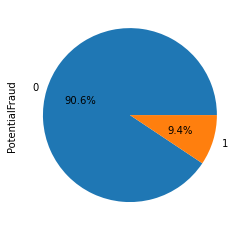

In [5]:
data1.groupby('PotentialFraud')['PotentialFraud'].count().plot(kind='pie',y='PotentialFraud',autopct='%1.1f%%')

In [241]:
data1.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\data1.csv',index=False)

In [2]:
data1=pd.read_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\data1.csv')

In [248]:
data2.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\data2.csv',index=False)

In [3]:
data_2=pd.read_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\data2.csv')
data2=data_2.drop(columns='Unnamed: 0')

## Merge the data1 set & and the data 2 set with health dataset on provider to make the development dataset & Validation set respectively. 
We get health_development as development dataset and health_validation as validation dataset.

In [27]:
health_development=pd.merge(health,data1, on='Provider')
health_validation=pd.merge(health,data2, on='Provider')

In [28]:
print(health_development.shape)
print(health_validation.shape)

(5004, 85)
(406, 85)


Now each dataset contains 85 columns among which 83 are features and 2 are Provider and PotentialFraud

In [26]:
health_validation.head()

,Provider,ClaimID_nunique,ClaimID_count,BeneID_nunique,BeneID_count,InscClaimAmtReimbursed_merged_sum,InscClaimAmtReimbursed_merged_mean,InscClaimAmtReimbursed_merged_min,InscClaimAmtReimbursed_merged_max,InscClaimAmtReimbursed_merged_std,Gender_1_merged_sum,Gender_2_merged_sum,Race_1_merged_sum,Race_2_merged_sum,Race_3_merged_sum,Race_5_merged_sum,ChronicCond_Alzheimer_merged_sum,ChronicCond_Heartfailure_merged_sum,ChronicCond_KidneyDisease_merged_sum,ChronicCond_Cancer_merged_sum,ChronicCond_ObstrPulmonary_merged_sum,ChronicCond_Depression_merged_sum,ChronicCond_Diabetes_merged_sum,ChronicCond_IschemicHeart_merged_sum,ChronicCond_Osteoporasis_merged_sum,ChronicCond_rheumatoidarthritis_merged_sum,ChronicCond_stroke_merged_sum,Claim_duration_merged_mean,Age_merged_mean,Age_merged_min,Age_merged_max,Flag_suspicious_merged_sum,ClmDiagnosisCode_1_out_count,ClmDiagnosisCode_1_out_nunique,ClmDiagnosisCode_2_out_count,ClmDiagnosisCode_2_out_nunique,ClmDiagnosisCode_3_out_count,ClmDiagnosisCode_3_out_nunique,ClmDiagnosisCode_4_out_count,ClmDiagnosisCode_4_out_nunique,ClmDiagnosisCode_5_out_count,ClmDiagnosisCode_5_out_nunique,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_6_out_nunique,ClmDiagnosisCode_7_out_count,ClmDiagnosisCode_7_out_nunique,ClmDiagnosisCode_8_out_count,ClmDiagnosisCode_8_out_nunique,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_9_out_nunique,AttendingPhysician_out_nunique,OperatingPhysician_out_nunique,OtherPhysician_out_nunique,InscClaimAmtReimbursed_out_sum,InscClaimAmtReimbursed_out_mean,InscClaimAmtReimbursed_out_min,InscClaimAmtReimbursed_out_max,InscClaimAmtReimbursed_out_std,ClmDiagnosisCode_1_in_count,ClmDiagnosisCode_1_in_nunique,ClmDiagnosisCode_2_in_count,ClmDiagnosisCode_2_in_nunique,ClmDiagnosisCode_3_in_count,ClmDiagnosisCode_3_in_nunique,ClmDiagnosisCode_4_in_count,ClmDiagnosisCode_4_in_nunique,ClmDiagnosisCode_5_in_count,ClmDiagnosisCode_5_in_nunique,ClmDiagnosisCode_6_in_count,ClmDiagnosisCode_6_in_nunique,ClmDiagnosisCode_7_in_count,ClmDiagnosisCode_7_in_nunique,ClmDiagnosisCode_8_in_count,ClmDiagnosisCode_8_in_nunique,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,AttendingPhysician_in_nunique,OperatingPhysician_in_nunique,OtherPhysician_in_nunique,InscClaimAmtReimbursed_in_sum,InscClaimAmtReimbursed_in_mean,InscClaimAmtReimbursed_in_min,InscClaimAmtReimbursed_in_max,InscClaimAmtReimbursed_in_std,PotentialFraud
0,PRV51041,34,34,31,34,7410,217.941176,0,3200,562.423217,14.0,20.0,26.0,8.0,0.0,0.0,16,17,7,10,10,15,22,24,7,9,2,3.352941,70.823529,38.0,91.0,31,34.0,33.0,20.0,18.0,14.0,12.0,6.0,5.0,5.0,5.0,4.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0,9.0,4.0,5.0,7410.0,217.941176,0.0,3200.0,562.423217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
1,PRV51042,142,142,128,142,48050,338.380282,0,3300,625.791569,64.0,78.0,135.0,6.0,0.0,1.0,50,74,58,20,41,56,87,108,33,38,13,2.232394,73.147887,27.0,100.0,133,140.0,128.0,83.0,63.0,53.0,47.0,37.0,33.0,17.0,17.0,9.0,9.0,7.0,7.0,4.0,4.0,3.0,3.0,52.0,27.0,27.0,48050.0,338.380282,0.0,3300.0,625.791569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
2,PRV51064,303,303,227,303,360320,1189.174917,0,37000,3480.867524,133.0,170.0,237.0,65.0,0.0,1.0,110,191,139,39,107,145,221,239,101,92,41,2.950495,73.415842,29.0,100.0,278,262.0,225.0,169.0,116.0,115.0,87.0,72.0,61.0,43.0,40.0,34.0,33.0,24.0,22.0,14.0,13.0,8.0,8.0,97.0,32.0,61.0,80320.0,300.823970,0.0,3300.0,539.722216,36.0,31.0,36.0,33.0,34.0,28.0,33.0,30.0,33.0,26.0,32.0,31.0,29.0,28.0,26.0,24.0,21.0,21.0,28.0,17.0,6.0,280000.0,7777.777778,0.0,37000.0,7187.732053,1
3,PRV51098,4,4,4,4,300,75.000000,10,200,85.049005,2.0,2.0,4.0,0.0,0.0,0.0,0,4,2,1,2,2,4,4,1,3,1,1.000000,82.500000,69.0,90.0,4,4.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,300.0,75.000000,10.0,200.0,85.049005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

- Here we will work on development data to make our model. we will not touch the validation dataset. we will save that file in a csv file named  health_validation on which we will perform our model scoring in the scoring part

In [23]:
health_validation.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\health_validation.csv',index=False)

In [29]:
dev=health_development

In [30]:
dev.head()

,Provider,ClaimID_nunique,ClaimID_count,BeneID_nunique,BeneID_count,InscClaimAmtReimbursed_merged_sum,InscClaimAmtReimbursed_merged_mean,InscClaimAmtReimbursed_merged_min,InscClaimAmtReimbursed_merged_max,InscClaimAmtReimbursed_merged_std,Gender_1_merged_sum,Gender_2_merged_sum,Race_1_merged_sum,Race_2_merged_sum,Race_3_merged_sum,Race_5_merged_sum,ChronicCond_Alzheimer_merged_sum,ChronicCond_Heartfailure_merged_sum,ChronicCond_KidneyDisease_merged_sum,ChronicCond_Cancer_merged_sum,ChronicCond_ObstrPulmonary_merged_sum,ChronicCond_Depression_merged_sum,ChronicCond_Diabetes_merged_sum,ChronicCond_IschemicHeart_merged_sum,ChronicCond_Osteoporasis_merged_sum,ChronicCond_rheumatoidarthritis_merged_sum,ChronicCond_stroke_merged_sum,Claim_duration_merged_mean,Age_merged_mean,Age_merged_min,Age_merged_max,Flag_suspicious_merged_sum,ClmDiagnosisCode_1_out_count,ClmDiagnosisCode_1_out_nunique,ClmDiagnosisCode_2_out_count,ClmDiagnosisCode_2_out_nunique,ClmDiagnosisCode_3_out_count,ClmDiagnosisCode_3_out_nunique,ClmDiagnosisCode_4_out_count,ClmDiagnosisCode_4_out_nunique,ClmDiagnosisCode_5_out_count,ClmDiagnosisCode_5_out_nunique,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_6_out_nunique,ClmDiagnosisCode_7_out_count,ClmDiagnosisCode_7_out_nunique,ClmDiagnosisCode_8_out_count,ClmDiagnosisCode_8_out_nunique,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_9_out_nunique,AttendingPhysician_out_nunique,OperatingPhysician_out_nunique,OtherPhysician_out_nunique,InscClaimAmtReimbursed_out_sum,InscClaimAmtReimbursed_out_mean,InscClaimAmtReimbursed_out_min,InscClaimAmtReimbursed_out_max,InscClaimAmtReimbursed_out_std,ClmDiagnosisCode_1_in_count,ClmDiagnosisCode_1_in_nunique,ClmDiagnosisCode_2_in_count,ClmDiagnosisCode_2_in_nunique,ClmDiagnosisCode_3_in_count,ClmDiagnosisCode_3_in_nunique,ClmDiagnosisCode_4_in_count,ClmDiagnosisCode_4_in_nunique,ClmDiagnosisCode_5_in_count,ClmDiagnosisCode_5_in_nunique,ClmDiagnosisCode_6_in_count,ClmDiagnosisCode_6_in_nunique,ClmDiagnosisCode_7_in_count,ClmDiagnosisCode_7_in_nunique,ClmDiagnosisCode_8_in_count,ClmDiagnosisCode_8_in_nunique,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,AttendingPhysician_in_nunique,OperatingPhysician_in_nunique,OtherPhysician_in_nunique,InscClaimAmtReimbursed_in_sum,InscClaimAmtReimbursed_in_mean,InscClaimAmtReimbursed_in_min,InscClaimAmtReimbursed_in_max,InscClaimAmtReimbursed_in_std,PotentialFraud
0,PRV51001,25,25,24,25,104640,4185.600000,10,42000,10796.091144,9.0,16.0,21.0,4.0,0.0,0.0,15,19,17,5,10,9,21,23,6,8,6,2.440000,78.840000,57.0,98.0,24,19.0,18.0,11.0,11.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,7.0,7640.0,382.000000,10.0,1500.0,422.817617,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0,1.0,97000.0,19400.000000,3000.0,42000.0,18352.111595,0
1,PRV51003,132,132,117,132,605670,4588.409091,0,57000,7309.794729,54.0,78.0,107.0,24.0,0.0,1.0,56,80,64,10,41,54,100,112,33,38,12,4.674242,70.022727,38.0,97.0,117,70.0,66.0,50.0,41.0,31.0,22.0,19.0,15.0,8.0,8.0,4.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,44.0,5.0,22.0,32670.0,466.714286,0.0,3300.0,821.364579,62.0,52.0,62.0,53.0,61.0,48.0,59.0,47.0,58.0,49.0,54.0,44.0,52.0,45.0,47.0,39.0,44.0,37.0,2.0,2.0,0.0,573000.0,9241.935484,0.0,57000.0,8513.606244,1
2,PRV51004,149,149,138,149,52170,350.134228,0,3300,689.963754,46.0,103.0,120.0,24.0,5.0,0.0,64,88,50,16,41,63,105,108,49,46,17,2.429530,72.161074,26.0,100.0,136,143.0,128.0,91.0,68.0,56.0,52.0,34.0,32.0,24.0,21.0,16.0,12.0,9.0,8.0,8.0,7.0,4.0,4.0,38.0,19.0,26.0,52170.0,350.134228,0.0,3300.0,689.963754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
3,PRV51005,1165,1165,495,1165,280910,241.124464,0,4080,491.556392,511.0,654.0,893.0,262.0,10.0,0.0,426,680,507,165,295,485,799,895,344,331,124,2.088412,70.475536,29.0,101.0,940,1149.0,809.0,723.0,327.0,455.0,232.0,287.0,186.0,164.0,113.0,100.0,79.0,68.0,61.0,43.0,40.0,26.0,25.0,6.0,6.0,4.0,280910.0,241.124464,0.0,4080.0,4

# Data Preparation : EDA, Preprocessing and Feature Engineering on the Development sample

### Create user derived Features
- Use a prefix on each derived feature like "derived" in order to quickly filter feature names

In [33]:
dev_copy = dev.copy(deep=True)

1. Deriving a flag from the distribution of Age_merged_max column

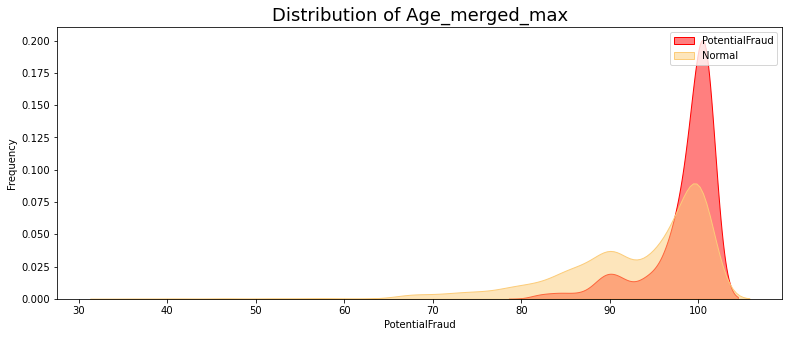

In [34]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Age_merged_max"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Age_merged_max"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Age_merged_max', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [35]:
x=dev_copy[dev_copy['Age_merged_max'] >100]

In [36]:
x.head(2)

,Provider,ClaimID_nunique,ClaimID_count,BeneID_nunique,BeneID_count,InscClaimAmtReimbursed_merged_sum,InscClaimAmtReimbursed_merged_mean,InscClaimAmtReimbursed_merged_min,InscClaimAmtReimbursed_merged_max,InscClaimAmtReimbursed_merged_std,Gender_1_merged_sum,Gender_2_merged_sum,Race_1_merged_sum,Race_2_merged_sum,Race_3_merged_sum,Race_5_merged_sum,ChronicCond_Alzheimer_merged_sum,ChronicCond_Heartfailure_merged_sum,ChronicCond_KidneyDisease_merged_sum,ChronicCond_Cancer_merged_sum,ChronicCond_ObstrPulmonary_merged_sum,ChronicCond_Depression_merged_sum,ChronicCond_Diabetes_merged_sum,ChronicCond_IschemicHeart_merged_sum,ChronicCond_Osteoporasis_merged_sum,ChronicCond_rheumatoidarthritis_merged_sum,ChronicCond_stroke_merged_sum,Claim_duration_merged_mean,Age_merged_mean,Age_merged_min,Age_merged_max,Flag_suspicious_merged_sum,ClmDiagnosisCode_1_out_count,ClmDiagnosisCode_1_out_nunique,ClmDiagnosisCode_2_out_count,ClmDiagnosisCode_2_out_nunique,ClmDiagnosisCode_3_out_count,ClmDiagnosisCode_3_out_nunique,ClmDiagnosisCode_4_out_count,ClmDiagnosisCode_4_out_nunique,ClmDiagnosisCode_5_out_count,ClmDiagnosisCode_5_out_nunique,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_6_out_nunique,ClmDiagnosisCode_7_out_count,ClmDiagnosisCode_7_out_nunique,ClmDiagnosisCode_8_out_count,ClmDiagnosisCode_8_out_nunique,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_9_out_nunique,AttendingPhysician_out_nunique,OperatingPhysician_out_nunique,OtherPhysician_out_nunique,InscClaimAmtReimbursed_out_sum,InscClaimAmtReimbursed_out_mean,InscClaimAmtReimbursed_out_min,InscClaimAmtReimbursed_out_max,InscClaimAmtReimbursed_out_std,ClmDiagnosisCode_1_in_count,ClmDiagnosisCode_1_in_nunique,ClmDiagnosisCode_2_in_count,ClmDiagnosisCode_2_in_nunique,ClmDiagnosisCode_3_in_count,ClmDiagnosisCode_3_in_nunique,ClmDiagnosisCode_4_in_count,ClmDiagnosisCode_4_in_nunique,ClmDiagnosisCode_5_in_count,ClmDiagnosisCode_5_in_nunique,ClmDiagnosisCode_6_in_count,ClmDiagnosisCode_6_in_nunique,ClmDiagnosisCode_7_in_count,ClmDiagnosisCode_7_in_nunique,ClmDiagnosisCode_8_in_count,ClmDiagnosisCode_8_in_nunique,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,AttendingPhysician_in_nunique,OperatingPhysician_in_nunique,OtherPhysician_in_nunique,InscClaimAmtReimbursed_in_sum,InscClaimAmtReimbursed_in_mean,InscClaimAmtReimbursed_in_min,InscClaimAmtReimbursed_in_max,InscClaimAmtReimbursed_in_std,PotentialFraud
3,PRV51005,1165,1165,495,1165,280910,241.124464,0,4080,491.556392,511.0,654.0,893.0,262.0,10.0,0.0,426,680,507,165,295,485,799,895,344,331,124,2.088412,70.475536,29.0,101.0,940,1149.0,809.0,723.0,327.0,455.0,232.0,287.0,186.0,164.0,113.0,100.0,79.0,68.0,61.0,43.0,40.0,26.0,25.0,6.0,6.0,4.0,280910.0,241.124464,0.0,4080.0,491.556392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,PRV51013,46,46,44,46,14880,323.478261,0,1800,471.622341,12.0,34.0,43.0,3.0,0.0,0.0,17,26,19,4,16,18,37,36,12,16,2,2.456522,74.391304,28.0,101.0,45,44.0,43.0,28.0,24.0,17.0,17.0,12.0,11.0,6.0,6.0,6.0,6.0,3.0,3.0,1.0,1.0,0.0,0.0,9.0,5.0,4.0,14880.0,323.478261,0.0,1800.0,471.622341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

0    528
1    172
Name: PotentialFraud, dtype: int64
Event Rate:24.57%


so we created a flag called derived_age_max_flag where 1 denotes Age_merged_max for that Provider is >100

In [42]:
dev_copy['derived_age_max_flag'] = np.where(dev_copy['Age_merged_max'] >100 , 1, 0)

2. Deriving a flag from the distribution of Age_merged_min column

In [43]:
x=dev_copy[dev_copy['Age_merged_min'] <30]

In [44]:
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

0    797
1    229
Name: PotentialFraud, dtype: int64
Event Rate:22.32%


So we created a flag called derived_age_min_flag where 1 denotes Age_merged_min for that Provider is <30

In [46]:
dev_copy['derived_age_min_flag'] = np.where(dev_copy['Age_merged_min']<30  , 1, 0)

3. Deriving a flag from the  InscClaimAmtReimbursed_merged_max column
4. Deriving a flag from the  InscClaimAmtReimbursed_in_max column <br>

Both the flags are based on mean+3*std deviation as 1 whether the max amount is greater or equal to mean+3*std deviation

In [47]:
#mean+3sigma flag of InscClaimAmtReimbursed for inpatient and outpatient also
dev_copy['derived_InscClaimAmtReimbursed_merged_flag'] = np.where(dev_copy['InscClaimAmtReimbursed_merged_max']>= dev_copy['InscClaimAmtReimbursed_merged_mean']+3*dev_copy['InscClaimAmtReimbursed_merged_std'] , 1, 0)

dev_copy['derived_InscClaimAmtReimbursed_in_flag'] = np.where(dev_copy['InscClaimAmtReimbursed_in_max']>= dev_copy['InscClaimAmtReimbursed_in_mean']+3*dev_copy['InscClaimAmtReimbursed_in_std'] , 1, 0)

- **Now we are going to derive flags on the basis of distribution of various diseases** <br>
The reasons are stated below :

In [62]:
#from Diseases ChronicCond_Alzheimer_merged_sum here in range (100,500) with event rate almost 50% 

dev_copy['derived_ChronicCond_Alzheimer_flag'] = np.where(dev_copy['ChronicCond_Alzheimer_merged_sum']>=150 , 1, 0)

#from Diseases ChronicCond_Heartfailure_merged_sum here in range (150,20) with event rate 32.8% 

dev_copy['derived_ChronicCond_Heartfailure_flag'] = np.where(dev_copy['ChronicCond_Heartfailure_merged_sum']>=150, 1, 0)

#from Diseases ChronicCond_KidneyDisease_merged_sum here in range (100,2000) with event rate % 

dev_copy['derived_ChronicCond_KidneyDisease_flag'] = np.where(dev_copy['ChronicCond_KidneyDisease_merged_sum']>=150, 1, 0)

dev_copy['derived_ChronicCond_Cancer_flag'] = np.where(dev_copy['ChronicCond_Cancer_merged_sum']>=70, 1, 0)

dev_copy['derived_ChronicCond_ObstrPulmonary_flag'] = np.where(dev_copy['ChronicCond_ObstrPulmonary_merged_sum']>=150 , 1, 0)

dev_copy['derived_ChronicCond_Depression_flag'] = np.where(dev_copy['ChronicCond_Depression_merged_sum']>=200 , 1, 0)

dev_copy['derived_ChronicCond_Diabetes_flag'] = np.where(dev_copy['ChronicCond_Diabetes_merged_sum']>=250, 1, 0)

dev_copy['derived_ChronicCond_IschemicHeart_flag'] = np.where(dev_copy['ChronicCond_IschemicHeart_merged_sum']>=350, 1, 0)

dev_copy['derived_ChronicCond_Osteoporasis_flag'] = np.where(dev_copy['ChronicCond_Osteoporasis_merged_sum']>=150, 1, 0)

dev_copy['derived_ChronicCond_rheumatoidarthritis_flag'] = np.where(dev_copy['ChronicCond_rheumatoidarthritis_merged_sum']>=150, 1, 0)

dev_copy['derived_ChronicCond_stroke_flag'] = np.where(dev_copy['ChronicCond_stroke_merged_sum']>=50, 1, 0)

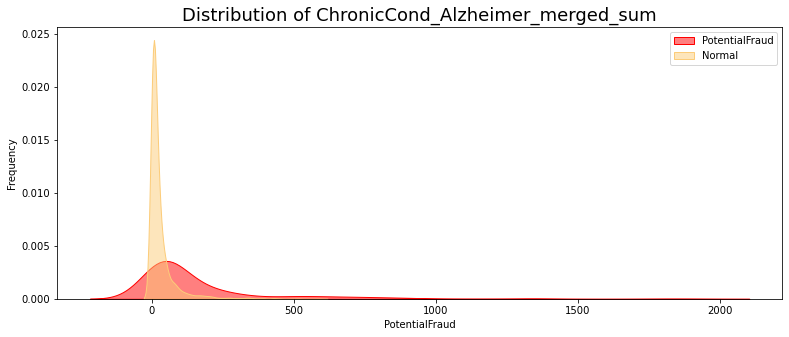

Value Counts of 1 and 0 :
0    164
1    126
Name: PotentialFraud, dtype: int64
Event Rate:43.45%
So we created this flag which takes the value 1 if ChronicCond_Alzheimer_merged_sum >=150 otherwise 0


In [51]:
#derived_ChronicCond_Alzheimer_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_Alzheimer_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_Alzheimer_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_Alzheimer_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_Alzheimer_merged_sum'] >= 150]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_Alzheimer_merged_sum >=150 otherwise 0")

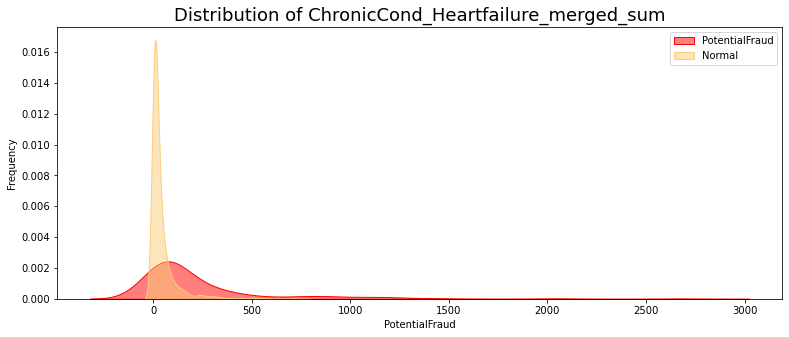

Value Counts of 1 and 0 :
0    268
1    181
Name: PotentialFraud, dtype: int64
Event Rate:40.31%
So we created this flag which takes the value 1 if ChronicCond_Heartfailure_merged_sum >=150 otherwise 0


In [53]:
#derived_ChronicCond_Heartfailure_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_Heartfailure_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_Heartfailure_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_Heartfailure_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_Heartfailure_merged_sum'] >= 150]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_Heartfailure_merged_sum >=150 otherwise 0")

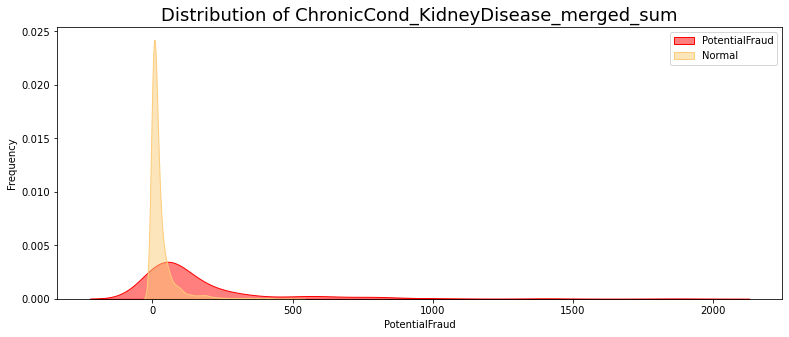

Value Counts of 1 and 0 :
0    169
1    135
Name: PotentialFraud, dtype: int64
Event Rate:44.41%
So we created this flag which takes the value 1 if ChronicCond_KidneyDisease_merged_sum >=150 otherwise 0


In [52]:
#derived_ChronicCond_KidneyDisease_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_KidneyDisease_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_KidneyDisease_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_KidneyDisease_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_KidneyDisease_merged_sum'] >= 150]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_KidneyDisease_merged_sum >=150 otherwise 0")

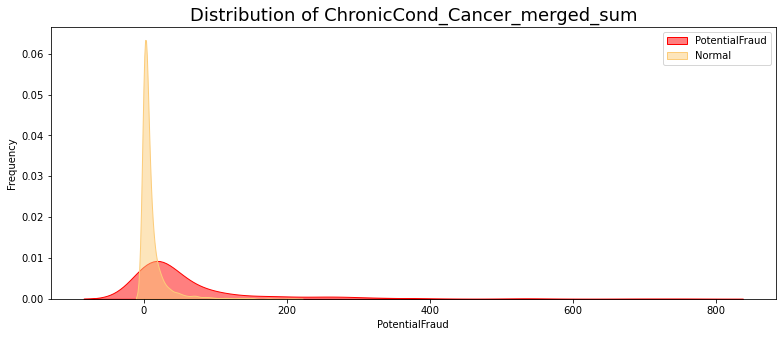

Value Counts of 1 and 0 :
0    116
1    111
Name: PotentialFraud, dtype: int64
Event Rate:48.90%
So we created this flag which takes the value 1 if ChronicCond_Cancer_merged_sum >=70 otherwise 0


In [54]:
#derived_ChronicCond_Cancer_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_Cancer_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_Cancer_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_Cancer_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_Cancer_merged_sum'] >= 70]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_Cancer_merged_sum >=70 otherwise 0")

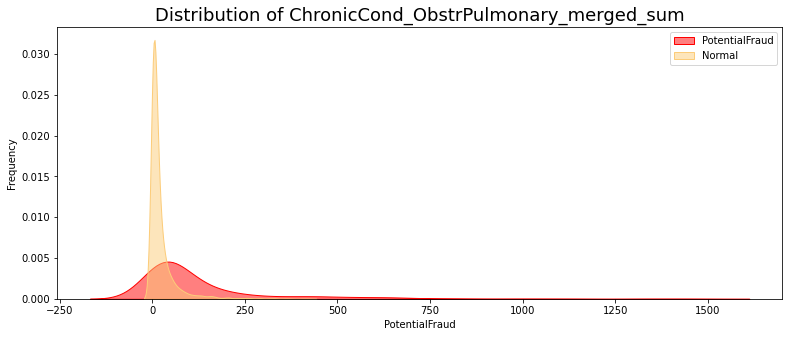

Value Counts of 1 and 0 :
1    105
0    101
Name: PotentialFraud, dtype: int64
Event Rate:50.97%
So we created this flag which takes the value 1 if ChronicCond_ObstrPulmonary_merged_sum >=150 otherwise 0


In [55]:
#derived_ChronicCond_ObstrPulmonary_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_ObstrPulmonary_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_ObstrPulmonary_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_ObstrPulmonary_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_ObstrPulmonary_merged_sum'] >= 150]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_ObstrPulmonary_merged_sum >=150 otherwise 0")

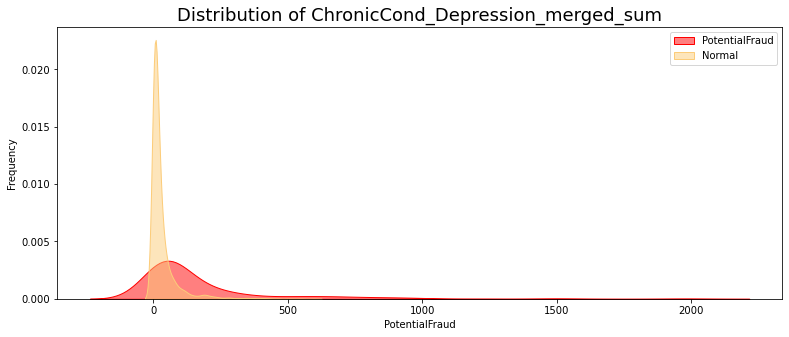

Value Counts of 1 and 0 :
0    116
1    111
Name: PotentialFraud, dtype: int64
Event Rate:48.90%
So we created this flag which takes the value 1 if ChronicCond_Depression_merged_sum >=200 otherwise 0


In [56]:
#derived_ChronicCond_Depression_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_Depression_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_Depression_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_Depression_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_Depression_merged_sum'] >= 200]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_Depression_merged_sum >=200 otherwise 0")

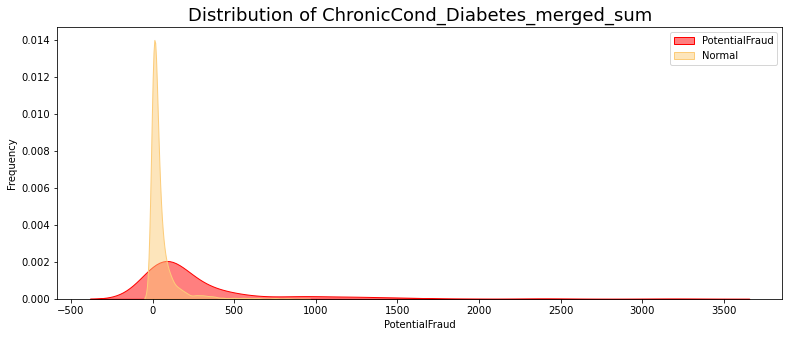

Value Counts of 1 and 0 :
0    181
1    130
Name: PotentialFraud, dtype: int64
Event Rate:41.80%
So we created this flag which takes the value 1 if ChronicCond_Diabetes_merged_sum >=250 otherwise 0


In [57]:
#derived_ChronicCond_Diabetes_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_Diabetes_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_Diabetes_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_Diabetes_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_Diabetes_merged_sum'] >= 250]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_Diabetes_merged_sum >=250 otherwise 0")

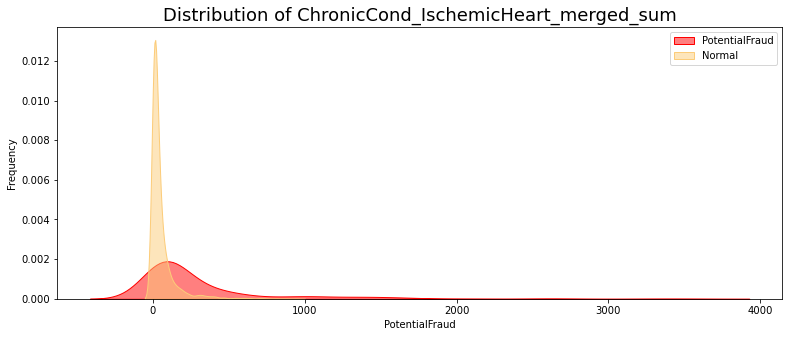

Value Counts of 1 and 0 :
0    113
1    112
Name: PotentialFraud, dtype: int64
Event Rate:49.78%
So we created this flag which takes the value 1 if ChronicCond_IschemicHeart_merged_sum >=350 otherwise 0


In [58]:
#derived_ChronicCond_IschemicHeart_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_IschemicHeart_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_IschemicHeart_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_IschemicHeart_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_IschemicHeart_merged_sum'] >= 350]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_IschemicHeart_merged_sum >=350 otherwise 0")

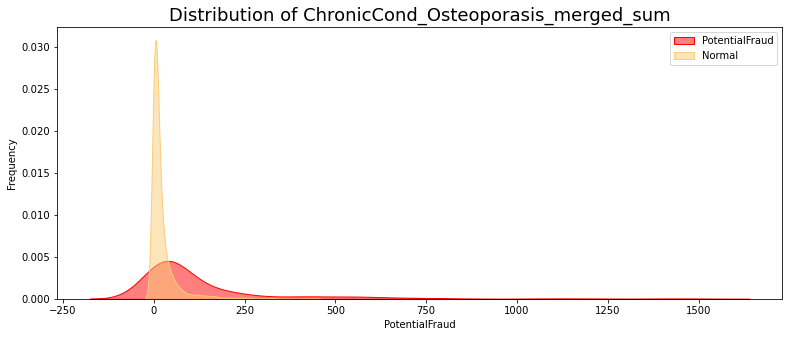

Value Counts of 1 and 0 :
0    111
1    107
Name: PotentialFraud, dtype: int64
Event Rate:49.08%
So we created this flag which takes the value 1 if ChronicCond_Osteoporasis_merged_sum >=150 otherwise 0


In [59]:
#derived_ChronicCond_Osteoporasis_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_Osteoporasis_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_Osteoporasis_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_Osteoporasis_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_Osteoporasis_merged_sum'] >= 150]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_Osteoporasis_merged_sum >=150 otherwise 0")

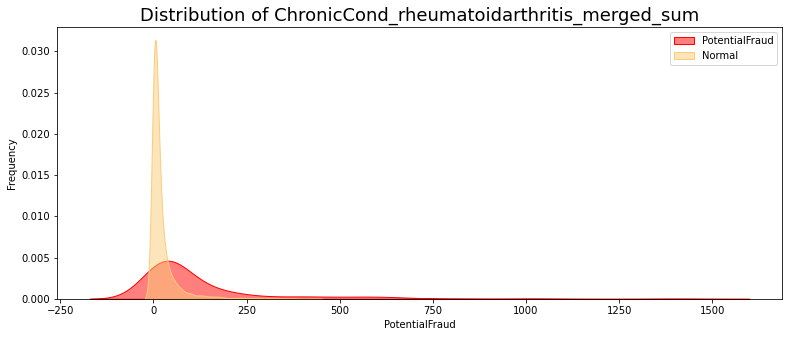

Value Counts of 1 and 0 :
1    105
0    103
Name: PotentialFraud, dtype: int64
Event Rate:50.48%
So we created this flag which takes the value 1 if ChronicCond_rheumatoidarthritis_merged_sum >=150 otherwise 0


In [60]:
#derived_ChronicCond_rheumatoidarthritis_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_rheumatoidarthritis_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_rheumatoidarthritis_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_rheumatoidarthritis_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_rheumatoidarthritis_merged_sum'] >= 150]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_rheumatoidarthritis_merged_sum >=150 otherwise 0")

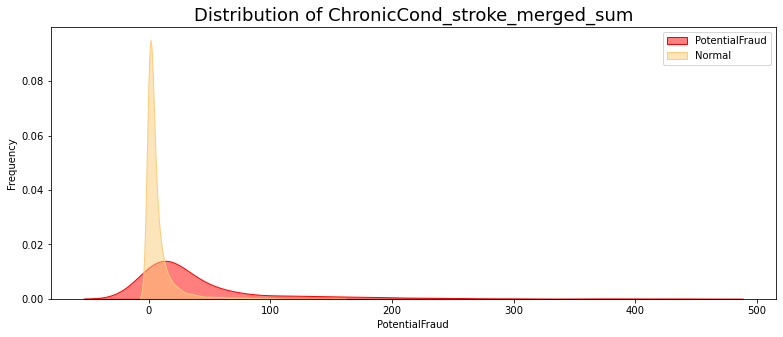

Value Counts of 1 and 0 :
1    111
0    105
Name: PotentialFraud, dtype: int64
Event Rate:51.39%
So we created this flag which takes the value 1 if ChronicCond_stroke_merged_sum >=50 otherwise 0


In [61]:
#derived_ChronicCond_stroke_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["ChronicCond_stroke_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["ChronicCond_stroke_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ChronicCond_stroke_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['ChronicCond_stroke_merged_sum'] >= 50]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_stroke_merged_sum >=50 otherwise 0")

- *Now from Genders deriving flags*

In [31]:
#from genders 

dev_copy['derived_Gender_1_flag'] = np.where(dev_copy['Gender_1_merged_sum']>200, 1, 0)
dev_copy['derived_Gender_2_flag'] = np.where(dev_copy['Gender_2_merged_sum']>250, 1, 0)

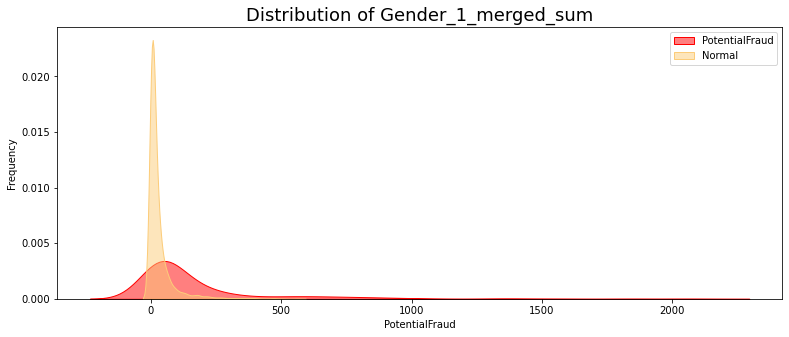

Value Counts of 1 and 0 :
0    110
1    104
Name: PotentialFraud, dtype: int64
Event Rate:48.60%
So we created this flag which takes the value 1 if Gender_1_merged_sum >200 otherwise 0


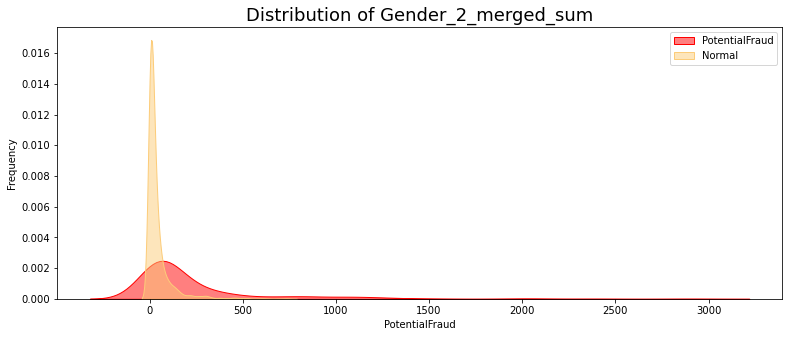

Value Counts of 1 and 0 :
0    132
1    116
Name: PotentialFraud, dtype: int64
Event Rate:46.77%
So we created this flag which takes the value 1 if ChronicCond_stroke_merged_sum >250 otherwise 0


In [64]:
#derived_Gender_1_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Gender_1_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Gender_1_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Gender_1_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['Gender_1_merged_sum'] > 200]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if Gender_1_merged_sum >200 otherwise 0")


#derived_Gender_2_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Gender_2_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Gender_2_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Gender_2_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['Gender_2_merged_sum'] > 250]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if ChronicCond_stroke_merged_sum >250 otherwise 0")

- *Now from OperatingPhysician_out_nunique and OtherPhysician_out_nunique deriving flags*

In [32]:
#from OperatingPhysician_out_nunique

dev_copy['derived_OperatingPhysician_flag'] = np.where(dev_copy['OperatingPhysician_out_nunique']>=30, 1, 0)
dev_copy['derived_OtherPhysician_flag'] = np.where(dev_copy['OtherPhysician_out_nunique'].between(60,500), 1, 0)

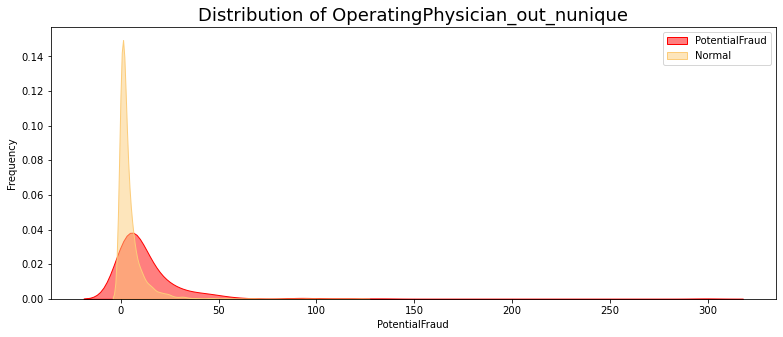

Value Counts of 1 and 0 :
0    68
1    53
Name: PotentialFraud, dtype: int64
Event Rate:43.80%
So we created this flag which takes the value 1 if OperatingPhysician_out_nunique >=30 otherwise 0


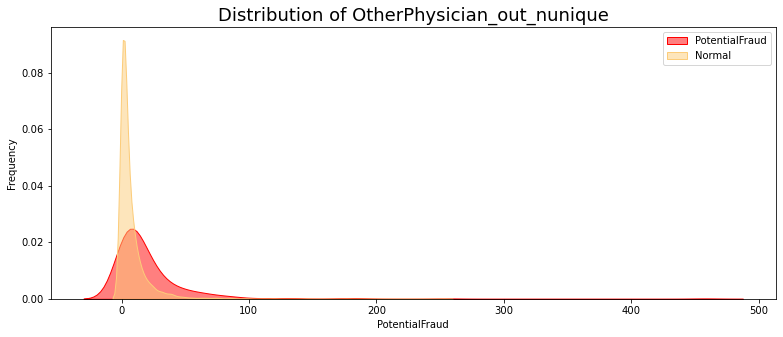

Value Counts of 1 and 0 :
0    50
1    35
Name: PotentialFraud, dtype: int64
Event Rate:41.18%
So we created this flag which takes the value 1 if OtherPhysician_out_nunique is in between 60 and 500 otherwise 0


In [65]:
#derived_OperatingPhysician_out_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["OperatingPhysician_out_nunique"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["OperatingPhysician_out_nunique"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of OperatingPhysician_out_nunique', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['OperatingPhysician_out_nunique'] >=30]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if OperatingPhysician_out_nunique >=30 otherwise 0")


#derived_OtherPhysician_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["OtherPhysician_out_nunique"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["OtherPhysician_out_nunique"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of OtherPhysician_out_nunique', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['OtherPhysician_out_nunique'].between(60,500)]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if OtherPhysician_out_nunique is in between 60 and 500 otherwise 0")

- *From claim diagonosis codes we create flags where it takes value 1 if it's count is greater or equal to unique count*

In [67]:
#from claim diagnosis codes ClmDiagnosisCodes


dev_copy['derived_ClmDiagnosisCode_1_flag'] = np.where(dev_copy['ClmDiagnosisCode_1_in_count']>dev_copy['ClmDiagnosisCode_1_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_2_flag'] = np.where(dev_copy['ClmDiagnosisCode_2_in_count']>dev_copy['ClmDiagnosisCode_2_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_3_flag'] = np.where(dev_copy['ClmDiagnosisCode_3_in_count']>dev_copy['ClmDiagnosisCode_3_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_4_flag'] = np.where(dev_copy['ClmDiagnosisCode_4_in_count']>dev_copy['ClmDiagnosisCode_4_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_5_flag'] = np.where(dev_copy['ClmDiagnosisCode_5_in_count']>dev_copy['ClmDiagnosisCode_5_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_6_flag'] = np.where(dev_copy['ClmDiagnosisCode_6_in_count']>dev_copy['ClmDiagnosisCode_6_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_7_flag'] = np.where(dev_copy['ClmDiagnosisCode_7_in_count']>dev_copy['ClmDiagnosisCode_7_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_8_flag'] = np.where(dev_copy['ClmDiagnosisCode_8_in_count']>dev_copy['ClmDiagnosisCode_8_in_nunique'], 1, 0)
dev_copy['derived_ClmDiagnosisCode_9_flag'] = np.where(dev_copy['ClmDiagnosisCode_9_in_count']>dev_copy['ClmDiagnosisCode_9_in_nunique'], 1, 0)




In [68]:
#from the races Race_1_merged_sum

dev_copy['derived_Race_1_flag'] = np.where(dev_copy['Race_1_merged_sum']>=np.percentile(dev_copy['Race_1_merged_sum'],95), 1, 0)
dev_copy['derived_Race_2_flag'] = np.where(dev_copy['Race_2_merged_sum']>=np.percentile(dev_copy['Race_2_merged_sum'],95), 1, 0)
dev_copy['derived_Race_3_flag'] = np.where(dev_copy['Race_3_merged_sum']>=30, 1, 0)
dev_copy['derived_Race_5_flag'] = np.where(dev_copy['Race_5_merged_sum']>=20, 1, 0)



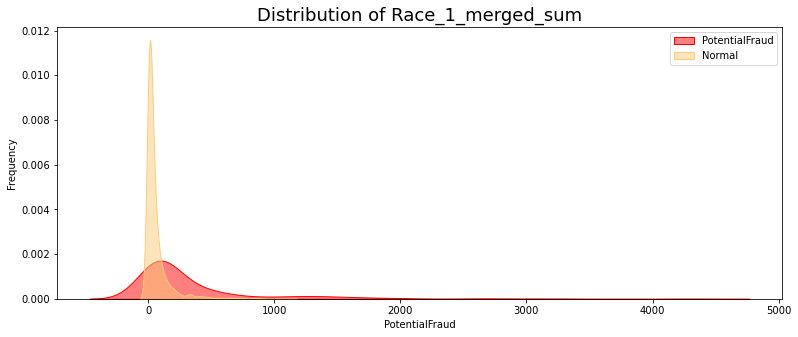

Value Counts of 1 and 0 :
0    134
1    118
Name: PotentialFraud, dtype: int64
Event Rate:46.83%
So we created this flag which takes the value 1 if Race_1_merged_sum >= 95th percentile  otherwise 0


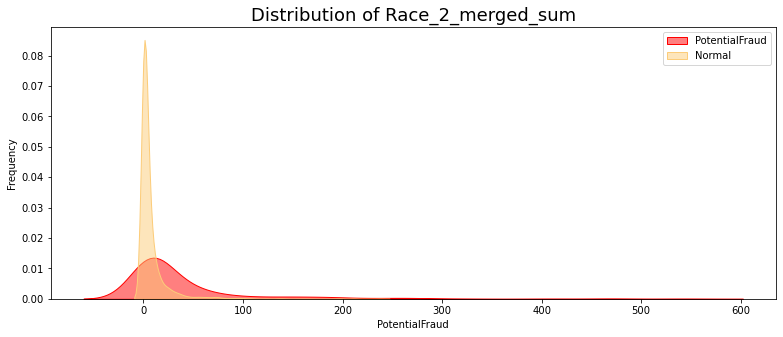

Value Counts of 1 and 0 :
0    144
1    108
Name: PotentialFraud, dtype: int64
Event Rate:42.86%
So we created this flag which takes the value 1 if Race_2_merged_sum 95th percentile otherwise 0


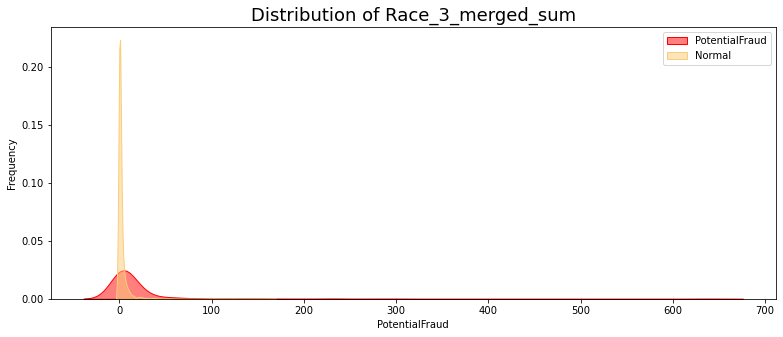

Value Counts of 1 and 0 :
1    49
0    45
Name: PotentialFraud, dtype: int64
Event Rate:52.13%
So we created this flag which takes the value 1 if Race_3_merged_sum >=30 otherwise 0


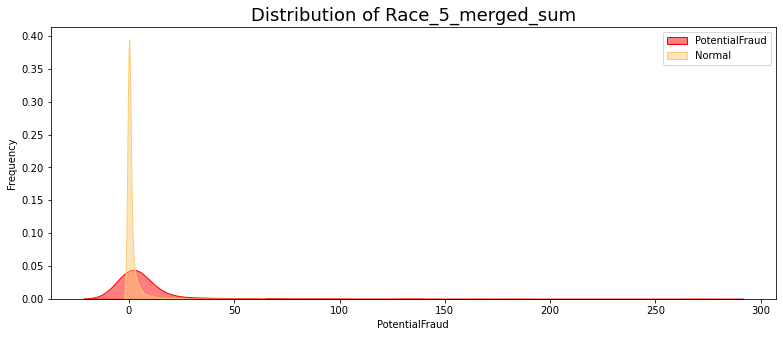

Value Counts of 1 and 0 :
1    48
0    46
Name: PotentialFraud, dtype: int64
Event Rate:51.06%
So we created this flag which takes the value 1 if Race_5_merged_sum >=20 otherwise 0


In [66]:
#derived_Race_1_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Race_1_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Race_1_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Race_1_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['Race_1_merged_sum']>=np.percentile(dev_copy['Race_1_merged_sum'],95)]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if Race_1_merged_sum >= 95th percentile  otherwise 0")


#derived_Race_2_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Race_2_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Race_2_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Race_2_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['Race_2_merged_sum']>=np.percentile(dev_copy['Race_2_merged_sum'],95)]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if Race_2_merged_sum 95th percentile otherwise 0")

#derived_Race_3_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Race_3_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Race_3_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Race_3_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['Race_3_merged_sum'] >= 30]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if Race_3_merged_sum >=30 otherwise 0")


#derived_Race_5_flag

fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==1]["Race_5_merged_sum"], alpha=0.5,shade = True, color="red", label="PotentialFraud", ax = ax)
sns.kdeplot(dev_copy[dev_copy["PotentialFraud"]==0]["Race_5_merged_sum"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Race_5_merged_sum', fontsize = 18)
ax.set_xlabel("PotentialFraud")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

x=dev_copy[dev_copy['Race_5_merged_sum'] >= 20]

print("Value Counts of 1 and 0 :")
print(x['PotentialFraud'].value_counts())
print('Event Rate:%0.2f%%' %((x.PotentialFraud.value_counts()[1]/(x.PotentialFraud.value_counts()[0]+x.PotentialFraud.value_counts()[1]))*100))

print("So we created this flag which takes the value 1 if Race_5_merged_sum >=20 otherwise 0")

In [128]:
derived_feat = [i for i in dev_copy.columns if i.startswith('derived') or i in (['Provider'])]

In [129]:
derived_feat

['Provider',
 'derived_age_max_flag',
 'derived_age_min_flag',
 'derived_InscClaimAmtReimbursed_merged_flag',
 'derived_InscClaimAmtReimbursed_in_flag',
 'derived_ChronicCond_Alzheimer_flag',
 'derived_ChronicCond_Heartfailure_flag',
 'derived_ChronicCond_KidneyDisease_flag',
 'derived_ChronicCond_Cancer_flag',
 'derived_ChronicCond_ObstrPulmonary_flag',
 'derived_ChronicCond_Depression_flag',
 'derived_ChronicCond_Diabetes_flag',
 'derived_ChronicCond_IschemicHeart_flag',
 'derived_ChronicCond_Osteoporasis_flag',
 'derived_ChronicCond_rheumatoidarthritis_flag',
 'derived_ChronicCond_stroke_flag',
 'derived_ClmDiagnosisCode_1_flag',
 'derived_ClmDiagnosisCode_2_flag',
 'derived_ClmDiagnosisCode_3_flag',
 'derived_ClmDiagnosisCode_4_flag',
 'derived_ClmDiagnosisCode_5_flag',
 'derived_ClmDiagnosisCode_6_flag',
 'derived_ClmDiagnosisCode_7_flag',
 'derived_ClmDiagnosisCode_8_flag',
 'derived_ClmDiagnosisCode_9_flag',
 'derived_Race_1_flag',
 'derived_Race_2_flag',
 'derived_Race_3_flag',

## Feature creation using Weight of Evidence method

In [71]:
import scorecardpy as sc

In [72]:
# filter variable via missing rate, iv, identical value rate from raw development sample
dev_filter = sc.var_filter(dev, y="PotentialFraud")

[INFO] filtering variables ...
Variable filtering on 5004 rows and 85 columns in 00:00:44 
1 variables are removed


In [73]:
print("Removed Features: {}".format(list(set(dev.columns) - set(dev_filter.columns))))

Removed Features: ['Provider']


In [74]:
# woe binning ------
bins = sc.woebin(dev_filter, y="PotentialFraud")


[INFO] creating woe binning ...
Binning on 5004 rows and 84 columns in 00:01:10


In [75]:
bins['Race_2_merged_sum']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,Race_2_merged_sum,"[-inf,1.0)",1524,0.304556,1487,37,0.024278,-1.422265,0.353806,0.989908,1.0,False
1,Race_2_merged_sum,"[1.0,2.0)",706,0.141087,683,23,0.032578,-1.119668,0.113566,0.989908,2.0,False
2,Race_2_merged_sum,"[2.0,5.0)",980,0.195843,908,72,0.073469,-0.263246,0.012196,0.989908,5.0,False
3,Race_2_merged_sum,"[5.0,22.0)",1230,0.245803,1079,151,0.122764,0.304822,0.025841,0.989908,22.0,False
4,Race_2_merged_sum,"[22.0,inf)",564,0.112710,379,185,0.328014,1.554152,0.484500,0.989908,inf,False


In [76]:
#bins[feat[10]]

In [77]:
# For each raw variable in development sample, Convert each value with corresponding BIN woe
dev_woe = sc.woebin_ply(dev, bins)

[INFO] converting into woe values ...


In [78]:
dev.head()

,Provider,ClaimID_nunique,ClaimID_count,BeneID_nunique,BeneID_count,InscClaimAmtReimbursed_merged_sum,InscClaimAmtReimbursed_merged_mean,InscClaimAmtReimbursed_merged_min,InscClaimAmtReimbursed_merged_max,InscClaimAmtReimbursed_merged_std,Gender_1_merged_sum,Gender_2_merged_sum,Race_1_merged_sum,Race_2_merged_sum,Race_3_merged_sum,Race_5_merged_sum,ChronicCond_Alzheimer_merged_sum,ChronicCond_Heartfailure_merged_sum,ChronicCond_KidneyDisease_merged_sum,ChronicCond_Cancer_merged_sum,ChronicCond_ObstrPulmonary_merged_sum,ChronicCond_Depression_merged_sum,ChronicCond_Diabetes_merged_sum,ChronicCond_IschemicHeart_merged_sum,ChronicCond_Osteoporasis_merged_sum,ChronicCond_rheumatoidarthritis_merged_sum,ChronicCond_stroke_merged_sum,Claim_duration_merged_mean,Age_merged_mean,Age_merged_min,Age_merged_max,Flag_suspicious_merged_sum,ClmDiagnosisCode_1_out_count,ClmDiagnosisCode_1_out_nunique,ClmDiagnosisCode_2_out_count,ClmDiagnosisCode_2_out_nunique,ClmDiagnosisCode_3_out_count,ClmDiagnosisCode_3_out_nunique,ClmDiagnosisCode_4_out_count,ClmDiagnosisCode_4_out_nunique,ClmDiagnosisCode_5_out_count,ClmDiagnosisCode_5_out_nunique,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_6_out_nunique,ClmDiagnosisCode_7_out_count,ClmDiagnosisCode_7_out_nunique,ClmDiagnosisCode_8_out_count,ClmDiagnosisCode_8_out_nunique,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_9_out_nunique,AttendingPhysician_out_nunique,OperatingPhysician_out_nunique,OtherPhysician_out_nunique,InscClaimAmtReimbursed_out_sum,InscClaimAmtReimbursed_out_mean,InscClaimAmtReimbursed_out_min,InscClaimAmtReimbursed_out_max,InscClaimAmtReimbursed_out_std,ClmDiagnosisCode_1_in_count,ClmDiagnosisCode_1_in_nunique,ClmDiagnosisCode_2_in_count,ClmDiagnosisCode_2_in_nunique,ClmDiagnosisCode_3_in_count,ClmDiagnosisCode_3_in_nunique,ClmDiagnosisCode_4_in_count,ClmDiagnosisCode_4_in_nunique,ClmDiagnosisCode_5_in_count,ClmDiagnosisCode_5_in_nunique,ClmDiagnosisCode_6_in_count,ClmDiagnosisCode_6_in_nunique,ClmDiagnosisCode_7_in_count,ClmDiagnosisCode_7_in_nunique,ClmDiagnosisCode_8_in_count,ClmDiagnosisCode_8_in_nunique,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,AttendingPhysician_in_nunique,OperatingPhysician_in_nunique,OtherPhysician_in_nunique,InscClaimAmtReimbursed_in_sum,InscClaimAmtReimbursed_in_mean,InscClaimAmtReimbursed_in_min,InscClaimAmtReimbursed_in_max,InscClaimAmtReimbursed_in_std,PotentialFraud
0,PRV51001,25,25,24,25,104640,4185.600000,10,42000,10796.091144,9.0,16.0,21.0,4.0,0.0,0.0,15,19,17,5,10,9,21,23,6,8,6,2.440000,78.840000,57.0,98.0,24,19.0,18.0,11.0,11.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,7.0,7640.0,382.000000,10.0,1500.0,422.817617,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0,1.0,97000.0,19400.000000,3000.0,42000.0,18352.111595,0
1,PRV51003,132,132,117,132,605670,4588.409091,0,57000,7309.794729,54.0,78.0,107.0,24.0,0.0,1.0,56,80,64,10,41,54,100,112,33,38,12,4.674242,70.022727,38.0,97.0,117,70.0,66.0,50.0,41.0,31.0,22.0,19.0,15.0,8.0,8.0,4.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,44.0,5.0,22.0,32670.0,466.714286,0.0,3300.0,821.364579,62.0,52.0,62.0,53.0,61.0,48.0,59.0,47.0,58.0,49.0,54.0,44.0,52.0,45.0,47.0,39.0,44.0,37.0,2.0,2.0,0.0,573000.0,9241.935484,0.0,57000.0,8513.606244,1
2,PRV51004,149,149,138,149,52170,350.134228,0,3300,689.963754,46.0,103.0,120.0,24.0,5.0,0.0,64,88,50,16,41,63,105,108,49,46,17,2.429530,72.161074,26.0,100.0,136,143.0,128.0,91.0,68.0,56.0,52.0,34.0,32.0,24.0,21.0,16.0,12.0,9.0,8.0,8.0,7.0,4.0,4.0,38.0,19.0,26.0,52170.0,350.134228,0.0,3300.0,689.963754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
3,PRV51005,1165,1165,495,1165,280910,241.124464,0,4080,491.556392,511.0,654.0,893.0,262.0,10.0,0.0,426,680,507,165,295,485,799,895,344,331,124,2.088412,70.475536,29.0,101.0,940,1149.0,809.0,723.0,327.0,455.0,232.0,287.0,186.0,164.0,113.0,100.0,79.0,68.0,61.0,43.0,40.0,26.0,25.0,6.0,6.0,4.0,280910.0,241.124464,0.0,4080.0,4

In [79]:
dev_woe.head()

,Provider,PotentialFraud,ClmDiagnosisCode_4_out_nunique_woe,ClmDiagnosisCode_7_out_count_woe,InscClaimAmtReimbursed_in_std_woe,ChronicCond_KidneyDisease_merged_sum_woe,ClmDiagnosisCode_6_out_nunique_woe,Age_merged_min_woe,OperatingPhysician_in_nunique_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_std_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_stroke_merged_sum_woe,InscClaimAmtReimbursed_out_sum_woe,ClmDiagnosisCode_5_in_nunique_woe,ClaimID_nunique_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_5_out_count_woe,ClmDiagnosisCode_9_out_nunique_woe,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_merged_min_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,Race_2_merged_sum_woe,ChronicCond_Cancer_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_in_min_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_2_out_nunique_woe,Race_1_merged_sum_woe,BeneID_nunique_woe,ClmDiagnosisCode_2_in_nunique_woe,ClmDiagnosisCode_5_out_nunique_woe,ClmDiagnosisCode_1_in_nunique_woe,ChronicCond_Depression_merged_sum_woe,OtherPhysician_in_nunique_woe,ClmDiagnosisCode_2_out_count_woe,InscClaimAmtReimbursed_out_min_woe,ClmDiagnosisCode_1_in_count_woe,ChronicCond_Osteoporasis_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,ClmDiagnosisCode_1_out_nunique_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,ClmDiagnosisCode_3_out_count_woe,Claim_duration_merged_mean_woe,ClmDiagnosisCode_8_out_count_woe,Race_3_merged_sum_woe,ClmDiagnosisCode_4_in_count_woe,ClmDiagnosisCode_4_out_count_woe,ClmDiagnosisCode_6_in_nunique_woe,OtherPhysician_out_nunique_woe,ClmDiagnosisCode_8_in_nunique_woe,ClmDiagnosisCode_5_in_count_woe,ClaimID_count_woe,Gender_1_merged_sum_woe,ClmDiagnosisCode_7_in_count_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_3_in_nunique_woe,ClmDiagnosisCode_1_out_count_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_6_out_count_woe,ChronicCond_Heartfailure_merged_sum_woe,ChronicCond_Diabetes_merged_sum_woe,ClmDiagnosisCode_7_out_nunique_woe,ClmDiagnosisCode_9_out_count_woe,Age_merged_max_woe,ClmDiagnosisCode_3_out_nunique_woe,Flag_suspicious_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,Race_5_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ClmDiagnosisCode_4_in_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,BeneID_count_woe,InscClaimAmtReimbursed_in_mean_woe,ClmDiagnosisCode_9_in_count_woe,Age_merged_mean_woe,ChronicCond_IschemicHeart_merged_sum_woe,InscClaimAmtReimbursed_in_max_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_out_mean_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_merged_max_woe,OperatingPhysician_out_nunique_woe
0,PRV51001,0,-0.487425,-0.598459,1.594890,-0.616432,-0.638351,-0.931113,0.706212,-0.798056,1.671379,-1.630640,-0.369243,-0.788538,-0.563662,-0.391461,-0.326052,-0.612388,-0.682954,0.710235,-1.273347,-0.704597,-0.263246,-0.261810,0.487697,0.490155,0.474033,0.304530,-0.451424,-0.614784,-0.952812,-0.370273,-0.680048,-0.360042,-0.936819,0.787152,-0.753959,-0.647339,-0.315357,-0.663491,0.164371,-0.713800,-1.056398,-0.418606,-0.872820,-0.085252,-0.646625,-0.985193,-0.415992,-0.514616,0.563343,-0.116136,-0.850482,-0.362610,-0.391461,-0.779034,-0.616900,-0.680597,-0.451985,-0.547580,0.265013,-0.387143,-1.027394,-0.679975,-0.601604,-0.682954,0.246057,-0.702003,-0.451857,1.133735,-0.654107,-0.649602,-0.314615,-0.846731,-0.391461,1.251756,-1.111927,-0.690498,-0.894418,1.057651,-0.556903,-0.270062,-0.589810,1.494571,-0.382496
1,PRV51003,1,0.069247,-0.598459,1.594890,0.608696,-0.638351,0.143511,0.706212,0.418948,1.671379,2.684431,0.506889,0.407252,2.456536,0.601531,2.577777,0.050986,-0.206794,0.710235,0.386290,0.145465,1.554152,-0.261810,2.442959,3.036800,-0.206406,1.301469,0.086416,0.754813,0.734336,2.649612,0.238411,2.644259,0.710777,-0.627943,0.377697,0.302124,2.572739,0.475109,-0.032534,0.122419,2.502515,2.579116,0.050761,0.831951,0.003557,-0.985193,2.596463,0.

In [80]:
woe_feat_dev = [i for i in dev_woe.columns if i.endswith('_woe') or i in (['Provider'])]

In [81]:
#woe_feat_dev

In [82]:
feat=dev.columns
feat=list(feat.drop(['Provider','PotentialFraud']))
#feat

In [83]:
dev_iv=pd.DataFrame()
for i in range(0,len(feat)):
    dev_iv=dev_iv.append(pd.DataFrame(bins[feat[i]]))
dev_iv_final=dev_iv.groupby("variable")["total_iv"].agg(['mean'])
dev_iv_final.reset_index(level=0,inplace=True)
#dev_iv_final

In [84]:
dev_iv_final.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\dev_iv_final.csv')

# 4. Bringing everything together

Merge all data and create the final feature list

In [85]:
dev_final_1 =pd.merge(dev_copy[derived_feat], dev_woe[woe_feat_dev], on='Provider', how='left')           

In [119]:
dev_final_1=pd.merge(dev_final_1,train_provider,  on='Provider', how='left')

In [120]:
dev_final_1.head()

,Provider,derived_age_max_flag,derived_age_min_flag,derived_InscClaimAmtReimbursed_merged_flag,derived_InscClaimAmtReimbursed_in_flag,derived_ChronicCond_Alzheimer_flag,derived_ChronicCond_Heartfailure_flag,derived_ChronicCond_KidneyDisease_flag,derived_ChronicCond_Cancer_flag,derived_ChronicCond_ObstrPulmonary_flag,derived_ChronicCond_Depression_flag,derived_ChronicCond_Diabetes_flag,derived_ChronicCond_IschemicHeart_flag,derived_ChronicCond_Osteoporasis_flag,derived_ChronicCond_rheumatoidarthritis_flag,derived_ChronicCond_stroke_flag,derived_ClmDiagnosisCode_1_flag,derived_ClmDiagnosisCode_2_flag,derived_ClmDiagnosisCode_3_flag,derived_ClmDiagnosisCode_4_flag,derived_ClmDiagnosisCode_5_flag,derived_ClmDiagnosisCode_6_flag,derived_ClmDiagnosisCode_7_flag,derived_ClmDiagnosisCode_8_flag,derived_ClmDiagnosisCode_9_flag,derived_Race_1_flag,derived_Race_2_flag,derived_Race_3_flag,derived_Race_5_flag,ClmDiagnosisCode_4_out_nunique_woe,ClmDiagnosisCode_7_out_count_woe,InscClaimAmtReimbursed_in_std_woe,ChronicCond_KidneyDisease_merged_sum_woe,ClmDiagnosisCode_6_out_nunique_woe,Age_merged_min_woe,OperatingPhysician_in_nunique_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_std_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_stroke_merged_sum_woe,InscClaimAmtReimbursed_out_sum_woe,ClmDiagnosisCode_5_in_nunique_woe,ClaimID_nunique_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_5_out_count_woe,ClmDiagnosisCode_9_out_nunique_woe,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_merged_min_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,Race_2_merged_sum_woe,ChronicCond_Cancer_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_in_min_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_2_out_nunique_woe,Race_1_merged_sum_woe,BeneID_nunique_woe,ClmDiagnosisCode_2_in_nunique_woe,ClmDiagnosisCode_5_out_nunique_woe,ClmDiagnosisCode_1_in_nunique_woe,ChronicCond_Depression_merged_sum_woe,OtherPhysician_in_nunique_woe,ClmDiagnosisCode_2_out_count_woe,InscClaimAmtReimbursed_out_min_woe,ClmDiagnosisCode_1_in_count_woe,ChronicCond_Osteoporasis_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,ClmDiagnosisCode_1_out_nunique_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,ClmDiagnosisCode_3_out_count_woe,Claim_duration_merged_mean_woe,ClmDiagnosisCode_8_out_count_woe,Race_3_merged_sum_woe,ClmDiagnosisCode_4_in_count_woe,ClmDiagnosisCode_4_out_count_woe,ClmDiagnosisCode_6_in_nunique_woe,OtherPhysician_out_nunique_woe,ClmDiagnosisCode_8_in_nunique_woe,ClmDiagnosisCode_5_in_count_woe,ClaimID_count_woe,Gender_1_merged_sum_woe,ClmDiagnosisCode_7_in_count_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_3_in_nunique_woe,ClmDiagnosisCode_1_out_count_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_6_out_count_woe,ChronicCond_Heartfailure_merged_sum_woe,ChronicCond_Diabetes_merged_sum_woe,ClmDiagnosisCode_7_out_nunique_woe,ClmDiagnosisCode_9_out_count_woe,Age_merged_max_woe,ClmDiagnosisCode_3_out_nunique_woe,Flag_suspicious_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,Race_5_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ClmDiagnosisCode_4_in_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,BeneID_count_woe,InscClaimAmtReimbursed_in_mean_woe,ClmDiagnosisCode_9_in_count_woe,Age_merged_mean_woe,ChronicCond_IschemicHeart_merged_sum_woe,InscClaimAmtReimbursed_in_max_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_out_mean_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_merged_max_woe,OperatingPhysician_out_nunique_woe,PotentialFraud
0,PRV51001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.487425,-0.598459,1.594890,-0.616432,-0.638351,-0.931113,0.706212,-0.798056,1.671379,-1.630640,-0.369243,-0.788538,-0.563662,-0.391461,-0.326052,-0.612388,-0.682954,0.710235,-1.273347,-0.704597,-0.263246,-0.261810,0.487697,0.490155,0.474033,0.304530,-0.451424,-0.614784,-0.952812,-0.370273,-0.680048,-0.

In [124]:
dev_final_1.shape

(5004, 113)

In [87]:
#check correlation

**Now we will check for correlation between the counts and unique counts of features that are created by WOE Method** --
because we know that counts and unique counts are highly correlated and if we take all of those variables for feature selection purpose or model development purpose then their collinearity will effect our further procedures and we will deviate from our result that we want. So we remove one between count and unique count from each of them and we keep that variable which has more correlation with PotentialFraud

In [126]:
count_nunique_features=[i for i in dev_final_1.columns if i.startswith('ClmDiagnosisCode') or i.startswith('BeneID') or i.startswith('ClaimID')]

In [127]:
len(count_nunique_features)

40

In [121]:
corrMatrix = dev_final_1.corr()

In [122]:
corrMatrix

,derived_age_max_flag,derived_age_min_flag,derived_InscClaimAmtReimbursed_merged_flag,derived_InscClaimAmtReimbursed_in_flag,derived_ChronicCond_Alzheimer_flag,derived_ChronicCond_Heartfailure_flag,derived_ChronicCond_KidneyDisease_flag,derived_ChronicCond_Cancer_flag,derived_ChronicCond_ObstrPulmonary_flag,derived_ChronicCond_Depression_flag,derived_ChronicCond_Diabetes_flag,derived_ChronicCond_IschemicHeart_flag,derived_ChronicCond_Osteoporasis_flag,derived_ChronicCond_rheumatoidarthritis_flag,derived_ChronicCond_stroke_flag,derived_ClmDiagnosisCode_1_flag,derived_ClmDiagnosisCode_2_flag,derived_ClmDiagnosisCode_3_flag,derived_ClmDiagnosisCode_4_flag,derived_ClmDiagnosisCode_5_flag,derived_ClmDiagnosisCode_6_flag,derived_ClmDiagnosisCode_7_flag,derived_ClmDiagnosisCode_8_flag,derived_ClmDiagnosisCode_9_flag,derived_Race_1_flag,derived_Race_2_flag,derived_Race_3_flag,derived_Race_5_flag,ClmDiagnosisCode_4_out_nunique_woe,ClmDiagnosisCode_7_out_count_woe,InscClaimAmtReimbursed_in_std_woe,ChronicCond_KidneyDisease_merged_sum_woe,ClmDiagnosisCode_6_out_nunique_woe,Age_merged_min_woe,OperatingPhysician_in_nunique_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_std_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_stroke_merged_sum_woe,InscClaimAmtReimbursed_out_sum_woe,ClmDiagnosisCode_5_in_nunique_woe,ClaimID_nunique_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_5_out_count_woe,ClmDiagnosisCode_9_out_nunique_woe,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_merged_min_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,Race_2_merged_sum_woe,ChronicCond_Cancer_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_in_min_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_2_out_nunique_woe,Race_1_merged_sum_woe,BeneID_nunique_woe,ClmDiagnosisCode_2_in_nunique_woe,ClmDiagnosisCode_5_out_nunique_woe,ClmDiagnosisCode_1_in_nunique_woe,ChronicCond_Depression_merged_sum_woe,OtherPhysician_in_nunique_woe,ClmDiagnosisCode_2_out_count_woe,InscClaimAmtReimbursed_out_min_woe,ClmDiagnosisCode_1_in_count_woe,ChronicCond_Osteoporasis_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,ClmDiagnosisCode_1_out_nunique_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,ClmDiagnosisCode_3_out_count_woe,Claim_duration_merged_mean_woe,ClmDiagnosisCode_8_out_count_woe,Race_3_merged_sum_woe,ClmDiagnosisCode_4_in_count_woe,ClmDiagnosisCode_4_out_count_woe,ClmDiagnosisCode_6_in_nunique_woe,OtherPhysician_out_nunique_woe,ClmDiagnosisCode_8_in_nunique_woe,ClmDiagnosisCode_5_in_count_woe,ClaimID_count_woe,Gender_1_merged_sum_woe,ClmDiagnosisCode_7_in_count_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_3_in_nunique_woe,ClmDiagnosisCode_1_out_count_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_6_out_count_woe,ChronicCond_Heartfailure_merged_sum_woe,ChronicCond_Diabetes_merged_sum_woe,ClmDiagnosisCode_7_out_nunique_woe,ClmDiagnosisCode_9_out_count_woe,Age_merged_max_woe,ClmDiagnosisCode_3_out_nunique_woe,Flag_suspicious_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,Race_5_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ClmDiagnosisCode_4_in_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,BeneID_count_woe,InscClaimAmtReimbursed_in_mean_woe,ClmDiagnosisCode_9_in_count_woe,Age_merged_mean_woe,ChronicCond_IschemicHeart_merged_sum_woe,InscClaimAmtReimbursed_in_max_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_out_mean_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_merged_max_woe,OperatingPhysician_out_nunique_woe,PotentialFraud
derived_age_max_flag,1.000000,0.304630,0.221162,0.026024,0.427631,0.441861,0.437684,0.404878,0.386205,0.410415,0.440262,0.410146,0.399381,0.392275,0.399100,0.166221,0.176076,0.167287,0.168959,0.158477,0.168341,0.177286,0.171884,0.176021,0.420852,0.352356,0.224273,0.211542,0.477619,0.457281,0.121719,0.383403,0.460297,0.289879,0.110378,0.395710,0.143800,0.176956,0.426842,0.441035,

In [99]:
#corrMatrix[['PotentialFraud']][count_nunique_features]

In [131]:
print(corrMatrix['PotentialFraud']['ClmDiagnosisCode_1_in_count_woe'])
print(corrMatrix['PotentialFraud']['ClmDiagnosisCode_1_in_nunique_woe'])

0.5225443285722493
0.5209262636633445


In [ ]:
Here we take that variable which has the higher correlation with PotentialFraud

In [117]:
corrMatrix['BeneID_count_woe']['BeneID_nunique_woe']

0.8938426172719431

In [118]:
corrMatrix['ClmDiagnosisCode_1_in_count_woe']['ClmDiagnosisCode_1_in_nunique_woe']

0.989074115824331

In [92]:
selected_between_count_nunique_feat=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\Selected from count and nunique.csv")
#selected_between_count_nunique_feat=list(selected_between_count_nunique_feat)
selected_between_count_nunique_feat

,selected variables
0,ClmDiagnosisCode_1_in_count_woe
1,ClmDiagnosisCode_2_in_count_woe
2,ClmDiagnosisCode_3_in_count_woe
3,ClmDiagnosisCode_4_in_count_woe
4,ClmDiagnosisCode_5_in_count_woe
5,ClmDiagnosisCode_6_in_count_woe
6,ClmDiagnosisCode_7_in_nunique_woe
7,ClmDiagnosisCode_8_in_count_woe
8,ClmDiagnosisCode_9_in_nunique_woe
9,ClmDiagnosisCode_1_out_nunique_woe


In [93]:
selected_between_count_nunique_feat_list=list(selected_between_count_nunique_feat['selected variables'])
selected_between_count_nunique_feat_list

['ClmDiagnosisCode_1_in_count_woe',
 'ClmDiagnosisCode_2_in_count_woe',
 'ClmDiagnosisCode_3_in_count_woe',
 'ClmDiagnosisCode_4_in_count_woe',
 'ClmDiagnosisCode_5_in_count_woe',
 'ClmDiagnosisCode_6_in_count_woe',
 'ClmDiagnosisCode_7_in_nunique_woe',
 'ClmDiagnosisCode_8_in_count_woe',
 'ClmDiagnosisCode_9_in_nunique_woe',
 'ClmDiagnosisCode_1_out_nunique_woe',
 'ClmDiagnosisCode_2_out_nunique_woe',
 'ClmDiagnosisCode_3_out_nunique_woe',
 'ClmDiagnosisCode_4_out_nunique_woe',
 'ClmDiagnosisCode_5_out_count_woe',
 'ClmDiagnosisCode_6_out_count_woe',
 'ClmDiagnosisCode_7_out_nunique_woe',
 'ClmDiagnosisCode_8_out_nunique_woe',
 'ClmDiagnosisCode_9_out_count_woe',
 'BeneID_nunique_woe',
 'ClaimID_count_woe']

In [94]:
to_delete_features=list(set(count_nunique_features)-set(selected_between_count_nunique_feat_list))
to_delete_features

['ClmDiagnosisCode_9_out_nunique_woe',
 'ClmDiagnosisCode_2_out_count_woe',
 'ClmDiagnosisCode_3_out_count_woe',
 'BeneID_count_woe',
 'ClmDiagnosisCode_6_out_nunique_woe',
 'ClmDiagnosisCode_8_out_count_woe',
 'ClmDiagnosisCode_8_in_nunique_woe',
 'ClmDiagnosisCode_9_in_count_woe',
 'ClmDiagnosisCode_4_in_nunique_woe',
 'ClmDiagnosisCode_3_in_nunique_woe',
 'ClmDiagnosisCode_1_in_nunique_woe',
 'ClmDiagnosisCode_7_out_count_woe',
 'ClaimID_nunique_woe',
 'ClmDiagnosisCode_4_out_count_woe',
 'ClmDiagnosisCode_6_in_nunique_woe',
 'ClmDiagnosisCode_7_in_count_woe',
 'ClmDiagnosisCode_2_in_nunique_woe',
 'ClmDiagnosisCode_1_out_count_woe',
 'ClmDiagnosisCode_5_out_nunique_woe',
 'ClmDiagnosisCode_5_in_nunique_woe']

In [101]:
dev_final=dev_final_1.drop(columns=to_delete_features)

In [102]:
dev_final.head()

,Provider,derived_age_max_flag,derived_age_min_flag,derived_InscClaimAmtReimbursed_merged_flag,derived_InscClaimAmtReimbursed_in_flag,derived_ChronicCond_Alzheimer_flag,derived_ChronicCond_Heartfailure_flag,derived_ChronicCond_KidneyDisease_flag,derived_ChronicCond_Cancer_flag,derived_ChronicCond_ObstrPulmonary_flag,derived_ChronicCond_Depression_flag,derived_ChronicCond_Diabetes_flag,derived_ChronicCond_IschemicHeart_flag,derived_ChronicCond_Osteoporasis_flag,derived_ChronicCond_rheumatoidarthritis_flag,derived_ChronicCond_stroke_flag,derived_ClmDiagnosisCode_1_flag,derived_ClmDiagnosisCode_2_flag,derived_ClmDiagnosisCode_3_flag,derived_ClmDiagnosisCode_4_flag,derived_ClmDiagnosisCode_5_flag,derived_ClmDiagnosisCode_6_flag,derived_ClmDiagnosisCode_7_flag,derived_ClmDiagnosisCode_8_flag,derived_ClmDiagnosisCode_9_flag,derived_Race_1_flag,derived_Race_2_flag,derived_Race_3_flag,derived_Race_5_flag,ClmDiagnosisCode_4_out_nunique_woe,InscClaimAmtReimbursed_in_std_woe,ChronicCond_KidneyDisease_merged_sum_woe,Age_merged_min_woe,OperatingPhysician_in_nunique_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_std_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_stroke_merged_sum_woe,InscClaimAmtReimbursed_out_sum_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_5_out_count_woe,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_merged_min_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,Race_2_merged_sum_woe,ChronicCond_Cancer_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_in_min_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_2_out_nunique_woe,Race_1_merged_sum_woe,BeneID_nunique_woe,ChronicCond_Depression_merged_sum_woe,OtherPhysician_in_nunique_woe,InscClaimAmtReimbursed_out_min_woe,ClmDiagnosisCode_1_in_count_woe,ChronicCond_Osteoporasis_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,ClmDiagnosisCode_1_out_nunique_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,Claim_duration_merged_mean_woe,Race_3_merged_sum_woe,ClmDiagnosisCode_4_in_count_woe,OtherPhysician_out_nunique_woe,ClmDiagnosisCode_5_in_count_woe,ClaimID_count_woe,Gender_1_merged_sum_woe,InscClaimAmtReimbursed_out_max_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_6_out_count_woe,ChronicCond_Heartfailure_merged_sum_woe,ChronicCond_Diabetes_merged_sum_woe,ClmDiagnosisCode_7_out_nunique_woe,ClmDiagnosisCode_9_out_count_woe,Age_merged_max_woe,ClmDiagnosisCode_3_out_nunique_woe,Flag_suspicious_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,Race_5_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,InscClaimAmtReimbursed_in_mean_woe,Age_merged_mean_woe,ChronicCond_IschemicHeart_merged_sum_woe,InscClaimAmtReimbursed_in_max_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_out_mean_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_merged_max_woe,OperatingPhysician_out_nunique_woe
0,PRV51001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.487425,1.594890,-0.616432,-0.931113,0.706212,-0.798056,1.671379,-1.630640,-0.369243,-0.788538,-0.326052,-0.612388,0.710235,-1.273347,-0.704597,-0.263246,-0.261810,0.487697,0.490155,0.474033,0.304530,-0.451424,-0.614784,-0.952812,-0.936819,0.787152,-0.647339,-0.315357,-0.663491,0.164371,-0.713800,-1.056398,-0.418606,-0.085252,-0.985193,-0.415992,-0.116136,-0.362610,-0.391461,-0.779034,-0.680597,0.265013,-0.387143,-1.027394,-0.679975,-0.601604,-0.682954,0.246057,-0.702003,-0.451857,1.133735,-0.654107,-0.649602,-0.846731,1.251756,-0.690498,-0.894418,1.057651,-0.556903,-0.270062,-0.589810,1.494571,-0.382496
1,PRV51003,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0.069247,1.594890,0.608696,0.143511,0.706212,0.418948,1.671379,2.684431,0.506889,0.407252,2.577777,0.050986,0.710235,0.386290,0.145465,1.554152,-0.261810,2.442959,3.036800,-0.206406,1.301469,0.086416,0.754813,0.734336,0.710777,-0.627943,0.302124,2.572739,0.475109,-0.032534,0.12241

In [110]:
dev_final.shape


(5004, 93)

In [109]:
dev_final=pd.merge(dev_final,train_provider, on='Provider', how='left')

In [70]:
x_feat=dev_final.drop(["PotentialFraud",'Provider'], axis=1)

In [71]:
x_feat.head()

,derived_age_max_flag,derived_age_min_flag,derived_InscClaimAmtReimbursed_merged_flag,derived_InscClaimAmtReimbursed_in_flag,derived_ChronicCond_Alzheimer_flag,derived_ChronicCond_Heartfailure_flag,derived_ChronicCond_KidneyDisease_flag,derived_ChronicCond_Cancer_flag,derived_ChronicCond_ObstrPulmonary_flag,derived_ChronicCond_Depression_flag,derived_ChronicCond_Diabetes_flag,derived_ChronicCond_IschemicHeart_flag,derived_ChronicCond_Osteoporasis_flag,derived_ChronicCond_rheumatoidarthritis_flag,derived_ChronicCond_stroke_flag,derived_Gender_1_flag,derived_Gender_2_flag,derived_OperatingPhysician_flag,derived_OtherPhysician_flag,derived_ClmDiagnosisCode_1_flag,derived_ClmDiagnosisCode_2_flag,derived_ClmDiagnosisCode_3_flag,derived_ClmDiagnosisCode_4_flag,derived_ClmDiagnosisCode_5_flag,derived_ClmDiagnosisCode_6_flag,derived_ClmDiagnosisCode_7_flag,derived_ClmDiagnosisCode_8_flag,derived_ClmDiagnosisCode_9_flag,derived_Race_1_flag,derived_Race_2_flag,derived_Race_3_flag,derived_Race_5_flag,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_4_in_count_woe,Claim_duration_merged_mean_woe,InscClaimAmtReimbursed_out_sum_woe,OtherPhysician_in_nunique_woe,ChronicCond_Cancer_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,InscClaimAmtReimbursed_out_mean_woe,ClaimID_count_woe,Race_3_merged_sum_woe,InscClaimAmtReimbursed_merged_min_woe,Flag_suspicious_merged_sum_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,ClmDiagnosisCode_9_out_count_woe,ClmDiagnosisCode_1_out_nunique_woe,Race_5_merged_sum_woe,Gender_1_merged_sum_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_4_out_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,ClmDiagnosisCode_3_out_nunique_woe,ClmDiagnosisCode_5_out_count_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_merged_max_woe,ChronicCond_Diabetes_merged_sum_woe,InscClaimAmtReimbursed_out_min_woe,Age_merged_min_woe,InscClaimAmtReimbursed_in_max_woe,InscClaimAmtReimbursed_in_min_woe,BeneID_nunique_woe,ChronicCond_Heartfailure_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ClmDiagnosisCode_6_out_count_woe,InscClaimAmtReimbursed_out_std_woe,ChronicCond_IschemicHeart_merged_sum_woe,ChronicCond_KidneyDisease_merged_sum_woe,OperatingPhysician_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,ClmDiagnosisCode_7_out_nunique_woe,ChronicCond_Osteoporasis_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_1_in_count_woe,InscClaimAmtReimbursed_in_sum_woe,ChronicCond_stroke_merged_sum_woe,ClmDiagnosisCode_2_out_nunique_woe,Age_merged_max_woe,Race_1_merged_sum_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_in_std_woe,Race_2_merged_sum_woe,OtherPhysician_out_nunique_woe,InscClaimAmtReimbursed_merged_std_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,InscClaimAmtReimbursed_in_mean_woe,ChronicCond_Depression_merged_sum_woe
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.710235,-0.680597,-0.326052,-1.056398,-0.415992,-0.085252,-0.788538,0.787152,-0.261810,-0.382496,-0.690498,-0.270062,-0.391461,-0.985193,-1.273347,-0.451857,-1.630640,-0.704597,-0.682954,-0.713800,-0.654107,-0.779034,0.304530,-0.487425,-0.846731,-0.702003,-0.612388,-0.556903,0.490155,1.494571,-0.679975,-0.647339,-0.931113,1.057651,0.474033,-0.952812,-1.027394,-0.649602,-0.387143,0.164371,-0.894418,-0.616432,0.706212,-0.418606,-0.601604,-0.663491,0.487697,-0.362610,-0.315357,0.265013,-0.369243,-0.451424,0.246057,-0.614784,-0.589810,1.594890,-0.263246,-0.116136,1.671379,-0.798056,1.133735,1.251756,-0.936819
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0.710235,0.360248,2.577777,2.502515,2.596463,0.831951,0.407252,-0.627943,-0.261810,0.436531,0.362694,-0.270062,0.601531,-0.985193,0.386290,0.613775,2.684431,0.145465,-0.294800,0.122419,0.1

# Step 3: Feature Selection

### This step will identify the important features that explains maximum variability of the model

- Select a small representive sample from the prepared data in last step
- Get feature importance score/ set of top N features using different techniques like:
  - WOE
  - RFE
  - Random Forest Feature importance score
  - Catboost Feature importance score
  - Decision Tree Feature importance score

<br>

*After getting their importances we save their cumulative score in a csv for each of the methods*

### Output of this step is the list of top features to be used in the model

#### Method-WOE

In [72]:
# filter variable via missing rate, iv, identical value rate from raw development sample
dev_final_filter = sc.var_filter(dev_final, y="PotentialFraud")

[INFO] filtering variables ...


In [73]:
# woe binning ------
final_bins = sc.woebin(dev_final_filter, y="PotentialFraud")
#final_bins

[INFO] creating woe binning ...
Binning on 5004 rows and 83 columns in 00:00:15


In [74]:
#final_bins['derived_ChronicCond_Cancer_flag']

In [75]:
# For each raw variable in development sample, Convert each value with corresponding BIN woe
dev_final_woe = sc.woebin_ply(dev_final, final_bins)

[INFO] converting into woe values ...


In [76]:
final_feat=dev_final_filter.columns
final_feat=list(final_feat.drop(['PotentialFraud']))
len(final_feat)

82

In [77]:
dev_final.head()

,Provider,derived_age_max_flag,derived_age_min_flag,derived_InscClaimAmtReimbursed_merged_flag,derived_InscClaimAmtReimbursed_in_flag,derived_ChronicCond_Alzheimer_flag,derived_ChronicCond_Heartfailure_flag,derived_ChronicCond_KidneyDisease_flag,derived_ChronicCond_Cancer_flag,derived_ChronicCond_ObstrPulmonary_flag,derived_ChronicCond_Depression_flag,derived_ChronicCond_Diabetes_flag,derived_ChronicCond_IschemicHeart_flag,derived_ChronicCond_Osteoporasis_flag,derived_ChronicCond_rheumatoidarthritis_flag,derived_ChronicCond_stroke_flag,derived_Gender_1_flag,derived_Gender_2_flag,derived_OperatingPhysician_flag,derived_OtherPhysician_flag,derived_ClmDiagnosisCode_1_flag,derived_ClmDiagnosisCode_2_flag,derived_ClmDiagnosisCode_3_flag,derived_ClmDiagnosisCode_4_flag,derived_ClmDiagnosisCode_5_flag,derived_ClmDiagnosisCode_6_flag,derived_ClmDiagnosisCode_7_flag,derived_ClmDiagnosisCode_8_flag,derived_ClmDiagnosisCode_9_flag,derived_Race_1_flag,derived_Race_2_flag,derived_Race_3_flag,derived_Race_5_flag,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_4_in_count_woe,Claim_duration_merged_mean_woe,InscClaimAmtReimbursed_out_sum_woe,OtherPhysician_in_nunique_woe,ChronicCond_Cancer_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,InscClaimAmtReimbursed_out_mean_woe,ClaimID_count_woe,Race_3_merged_sum_woe,InscClaimAmtReimbursed_merged_min_woe,Flag_suspicious_merged_sum_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,ClmDiagnosisCode_9_out_count_woe,ClmDiagnosisCode_1_out_nunique_woe,Race_5_merged_sum_woe,Gender_1_merged_sum_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_4_out_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,ClmDiagnosisCode_3_out_nunique_woe,ClmDiagnosisCode_5_out_count_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_merged_sum_woe,InscClaimAmtReimbursed_merged_max_woe,ChronicCond_Diabetes_merged_sum_woe,InscClaimAmtReimbursed_out_min_woe,Age_merged_min_woe,InscClaimAmtReimbursed_in_max_woe,InscClaimAmtReimbursed_in_min_woe,BeneID_nunique_woe,ChronicCond_Heartfailure_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ClmDiagnosisCode_6_out_count_woe,InscClaimAmtReimbursed_out_std_woe,ChronicCond_IschemicHeart_merged_sum_woe,ChronicCond_KidneyDisease_merged_sum_woe,OperatingPhysician_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,ClmDiagnosisCode_7_out_nunique_woe,ChronicCond_Osteoporasis_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_1_in_count_woe,InscClaimAmtReimbursed_in_sum_woe,ChronicCond_stroke_merged_sum_woe,ClmDiagnosisCode_2_out_nunique_woe,Age_merged_max_woe,Race_1_merged_sum_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_in_std_woe,Race_2_merged_sum_woe,OtherPhysician_out_nunique_woe,InscClaimAmtReimbursed_merged_std_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,InscClaimAmtReimbursed_in_mean_woe,ChronicCond_Depression_merged_sum_woe,PotentialFraud
0,PRV51001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.710235,-0.680597,-0.326052,-1.056398,-0.415992,-0.085252,-0.788538,0.787152,-0.261810,-0.382496,-0.690498,-0.270062,-0.391461,-0.985193,-1.273347,-0.451857,-1.630640,-0.704597,-0.682954,-0.713800,-0.654107,-0.779034,0.304530,-0.487425,-0.846731,-0.702003,-0.612388,-0.556903,0.490155,1.494571,-0.679975,-0.647339,-0.931113,1.057651,0.474033,-0.952812,-1.027394,-0.649602,-0.387143,0.164371,-0.894418,-0.616432,0.706212,-0.418606,-0.601604,-0.663491,0.487697,-0.362610,-0.315357,0.265013,-0.369243,-0.451424,0.246057,-0.614784,-0.589810,1.594890,-0.263246,-0.116136,1.671379,-0.798056,1.133735,1.251756,-0.936819,0
1,PRV51003,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0.710235,0.360248,2.577777,2.502515,2.596463,0.831951,0.407252,-0.627943,-0.261810,0.436531,0.362694,-0.270062,0.601531,-0.985193,0.386290,0.613

In [78]:
dev_final_iv=pd.DataFrame()
for i in range(0,len(final_feat)):
    dev_final_iv=dev_final_iv.append(pd.DataFrame(final_bins[final_feat[i]]))
dev_final_iv_final=dev_final_iv.groupby("variable")["total_iv"].agg(['mean'])
dev_final_iv_final.reset_index(level=0,inplace=True)
dev_final_iv_final

,variable,mean
0,Age_merged_max_woe,0.879041
1,Age_merged_mean_woe,0.459578
2,Age_merged_min_woe,0.935351
3,AttendingPhysician_in_nunique_woe,1.509325
4,AttendingPhysician_out_nunique_woe,0.859187
...,...,...
77,derived_InscClaimAmtReimbursed_merged_flag,0.393988
78,derived_Race_1_flag,0.535281
79,derived_Race_2_flag,0.440588
80,derived_age_max_flag,0.372683


In [79]:
dev_final_iv_final.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\dev_final_iv_final.csv')

### catboost method

In [80]:
from catboost import CatBoostClassifier

In [81]:
cat_model=CatBoostClassifier()
cat_model.fit(x_feat,dev_final['PotentialFraud'])

Learning rate set to 0.02049
0:	learn: 0.6550496	total: 168ms	remaining: 2m 47s
1:	learn: 0.6210765	total: 181ms	remaining: 1m 30s
2:	learn: 0.5912409	total: 191ms	remaining: 1m 3s
3:	learn: 0.5595527	total: 198ms	remaining: 49.3s
4:	learn: 0.5313343	total: 205ms	remaining: 40.8s
5:	learn: 0.5049471	total: 212ms	remaining: 35.1s
6:	learn: 0.4833324	total: 219ms	remaining: 31.1s
7:	learn: 0.4649685	total: 226ms	remaining: 28.1s
8:	learn: 0.4436307	total: 233ms	remaining: 25.7s
9:	learn: 0.4284758	total: 240ms	remaining: 23.8s
10:	learn: 0.4099947	total: 248ms	remaining: 22.3s
11:	learn: 0.3989250	total: 252ms	remaining: 20.8s
12:	learn: 0.3852641	total: 260ms	remaining: 19.7s
13:	learn: 0.3706050	total: 266ms	remaining: 18.7s
14:	learn: 0.3595419	total: 273ms	remaining: 17.9s
15:	learn: 0.3458428	total: 279ms	remaining: 17.2s
16:	learn: 0.3356677	total: 285ms	remaining: 16.5s
17:	learn: 0.3265273	total: 291ms	remaining: 15.9s
18:	learn: 0.3193333	total: 295ms	remaining: 15.2s
19:	learn:

166:	learn: 0.1384480	total: 1.3s	remaining: 6.5s
167:	learn: 0.1382765	total: 1.31s	remaining: 6.49s
168:	learn: 0.1380952	total: 1.32s	remaining: 6.48s
169:	learn: 0.1379026	total: 1.32s	remaining: 6.47s
170:	learn: 0.1377109	total: 1.33s	remaining: 6.46s
171:	learn: 0.1375469	total: 1.34s	remaining: 6.45s
172:	learn: 0.1373258	total: 1.35s	remaining: 6.44s
173:	learn: 0.1372248	total: 1.35s	remaining: 6.42s
174:	learn: 0.1370393	total: 1.36s	remaining: 6.41s
175:	learn: 0.1368027	total: 1.36s	remaining: 6.39s
176:	learn: 0.1366464	total: 1.37s	remaining: 6.38s
177:	learn: 0.1364762	total: 1.38s	remaining: 6.37s
178:	learn: 0.1363539	total: 1.39s	remaining: 6.35s
179:	learn: 0.1362361	total: 1.39s	remaining: 6.34s
180:	learn: 0.1360598	total: 1.4s	remaining: 6.32s
181:	learn: 0.1359287	total: 1.4s	remaining: 6.3s
182:	learn: 0.1357538	total: 1.41s	remaining: 6.29s
183:	learn: 0.1356436	total: 1.42s	remaining: 6.28s
184:	learn: 0.1355139	total: 1.42s	remaining: 6.26s
185:	learn: 0.135

346:	learn: 0.1144708	total: 2.44s	remaining: 4.59s
347:	learn: 0.1143527	total: 2.44s	remaining: 4.58s
348:	learn: 0.1141825	total: 2.45s	remaining: 4.57s
349:	learn: 0.1140478	total: 2.46s	remaining: 4.57s
350:	learn: 0.1139763	total: 2.47s	remaining: 4.56s
351:	learn: 0.1138747	total: 2.47s	remaining: 4.55s
352:	learn: 0.1136915	total: 2.48s	remaining: 4.55s
353:	learn: 0.1135184	total: 2.49s	remaining: 4.54s
354:	learn: 0.1134362	total: 2.49s	remaining: 4.53s
355:	learn: 0.1133443	total: 2.5s	remaining: 4.52s
356:	learn: 0.1132392	total: 2.5s	remaining: 4.51s
357:	learn: 0.1131482	total: 2.51s	remaining: 4.5s
358:	learn: 0.1130550	total: 2.52s	remaining: 4.49s
359:	learn: 0.1129624	total: 2.52s	remaining: 4.48s
360:	learn: 0.1128482	total: 2.53s	remaining: 4.47s
361:	learn: 0.1127594	total: 2.53s	remaining: 4.47s
362:	learn: 0.1126350	total: 2.54s	remaining: 4.46s
363:	learn: 0.1125290	total: 2.55s	remaining: 4.45s
364:	learn: 0.1124009	total: 2.55s	remaining: 4.44s
365:	learn: 0.1

527:	learn: 0.0957671	total: 3.58s	remaining: 3.2s
528:	learn: 0.0956959	total: 3.59s	remaining: 3.2s
529:	learn: 0.0956225	total: 3.6s	remaining: 3.19s
530:	learn: 0.0955337	total: 3.6s	remaining: 3.18s
531:	learn: 0.0954864	total: 3.61s	remaining: 3.18s
532:	learn: 0.0954491	total: 3.62s	remaining: 3.17s
533:	learn: 0.0954195	total: 3.63s	remaining: 3.16s
534:	learn: 0.0953874	total: 3.63s	remaining: 3.16s
535:	learn: 0.0953424	total: 3.64s	remaining: 3.15s
536:	learn: 0.0952595	total: 3.64s	remaining: 3.14s
537:	learn: 0.0952015	total: 3.65s	remaining: 3.13s
538:	learn: 0.0950870	total: 3.65s	remaining: 3.13s
539:	learn: 0.0949328	total: 3.66s	remaining: 3.12s
540:	learn: 0.0948359	total: 3.67s	remaining: 3.11s
541:	learn: 0.0948015	total: 3.67s	remaining: 3.1s
542:	learn: 0.0946896	total: 3.68s	remaining: 3.1s
543:	learn: 0.0946467	total: 3.69s	remaining: 3.09s
544:	learn: 0.0945394	total: 3.69s	remaining: 3.08s
545:	learn: 0.0945083	total: 3.7s	remaining: 3.07s
546:	learn: 0.09438

706:	learn: 0.0813467	total: 4.71s	remaining: 1.95s
707:	learn: 0.0812376	total: 4.72s	remaining: 1.95s
708:	learn: 0.0811421	total: 4.73s	remaining: 1.94s
709:	learn: 0.0810075	total: 4.73s	remaining: 1.93s
710:	learn: 0.0809496	total: 4.74s	remaining: 1.93s
711:	learn: 0.0809009	total: 4.75s	remaining: 1.92s
712:	learn: 0.0808522	total: 4.75s	remaining: 1.91s
713:	learn: 0.0807761	total: 4.76s	remaining: 1.91s
714:	learn: 0.0807499	total: 4.77s	remaining: 1.9s
715:	learn: 0.0806560	total: 4.77s	remaining: 1.89s
716:	learn: 0.0806306	total: 4.78s	remaining: 1.89s
717:	learn: 0.0804897	total: 4.79s	remaining: 1.88s
718:	learn: 0.0804175	total: 4.79s	remaining: 1.87s
719:	learn: 0.0803663	total: 4.8s	remaining: 1.86s
720:	learn: 0.0803221	total: 4.8s	remaining: 1.86s
721:	learn: 0.0802845	total: 4.81s	remaining: 1.85s
722:	learn: 0.0802506	total: 4.82s	remaining: 1.84s
723:	learn: 0.0801103	total: 4.82s	remaining: 1.84s
724:	learn: 0.0800665	total: 4.83s	remaining: 1.83s
725:	learn: 0.0

889:	learn: 0.0684501	total: 5.86s	remaining: 725ms
890:	learn: 0.0683599	total: 5.87s	remaining: 718ms
891:	learn: 0.0682733	total: 5.88s	remaining: 712ms
892:	learn: 0.0682381	total: 5.88s	remaining: 705ms
893:	learn: 0.0681409	total: 5.89s	remaining: 698ms
894:	learn: 0.0680976	total: 5.9s	remaining: 692ms
895:	learn: 0.0680221	total: 5.9s	remaining: 685ms
896:	learn: 0.0679708	total: 5.91s	remaining: 679ms
897:	learn: 0.0678936	total: 5.92s	remaining: 672ms
898:	learn: 0.0678273	total: 5.92s	remaining: 665ms
899:	learn: 0.0677598	total: 5.93s	remaining: 659ms
900:	learn: 0.0676647	total: 5.93s	remaining: 652ms
901:	learn: 0.0675987	total: 5.94s	remaining: 645ms
902:	learn: 0.0675374	total: 5.95s	remaining: 639ms
903:	learn: 0.0674887	total: 5.95s	remaining: 632ms
904:	learn: 0.0674383	total: 5.96s	remaining: 626ms
905:	learn: 0.0674040	total: 5.96s	remaining: 619ms
906:	learn: 0.0673447	total: 5.97s	remaining: 612ms
907:	learn: 0.0672687	total: 5.98s	remaining: 606ms
908:	learn: 0.

In [82]:
cat_imp=pd.DataFrame()
cat_imp['Features']=list(x_feat.columns)
cat_imp['Importance']=list(cat_model.feature_importances_)
cat_imp=cat_imp.sort_values(by=['Importance'],ascending=False)
cat_imp['Cumulative']=cat_imp.Importance.cumsum()
cat_imp

,Features,Importance,Cumulative
37,Claim_duration_merged_mean_woe,7.154644,7.154644
42,Age_merged_mean_woe,4.272376,11.427020
54,AttendingPhysician_out_nunique_woe,3.298216,14.725236
90,InscClaimAmtReimbursed_merged_std_woe,3.244919,17.970155
52,Race_5_merged_sum_woe,3.199457,21.169612
...,...,...,...
17,derived_OperatingPhysician_flag,0.062271,99.913039
6,derived_ChronicCond_KidneyDisease_flag,0.036359,99.949398
9,derived_ChronicCond_Depression_flag,0.024590,99.973989
10,derived_ChronicCond_Diabetes_flag,0.015456,99.989445


In [83]:
cat_imp.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\cat_imp_final.csv')

### random forest method

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rand_model=RandomForestClassifier()
rand_model.fit(x_feat,dev_final['PotentialFraud'])

RandomForestClassifier()

In [86]:
rand_imp=pd.DataFrame()
rand_imp['Features']=list(x_feat.columns)
rand_imp['Importance']=list(rand_model.feature_importances_)
rand_imp=rand_imp.sort_values(by=['Importance'],ascending=False)
rand_imp['Cumulative']=rand_imp.Importance.cumsum()
rand_imp

,Features,Importance,Cumulative
60,InscClaimAmtReimbursed_merged_sum_woe,0.079083,0.079083
34,ClmDiagnosisCode_2_in_count_woe,0.034215,0.113298
48,ClmDiagnosisCode_8_in_count_woe,0.032474,0.145772
81,InscClaimAmtReimbursed_in_sum_woe,0.031833,0.177605
36,ClmDiagnosisCode_4_in_count_woe,0.025916,0.203521
...,...,...,...
17,derived_OperatingPhysician_flag,0.002156,0.994222
6,derived_ChronicCond_KidneyDisease_flag,0.002055,0.996277
16,derived_Gender_2_flag,0.001450,0.997728
4,derived_ChronicCond_Alzheimer_flag,0.001143,0.998871


In [87]:
rand_imp.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\rand_imp_final.csv')

### Decision Tree Method

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_feat,dev_final['PotentialFraud'])

DecisionTreeClassifier()

In [90]:
dt_imp=pd.DataFrame()
dt_imp['Features']=list(x_feat.columns)
dt_imp['Importance']=list(dt_model.feature_importances_)
dt_imp=dt_imp.sort_values(by=['Importance'],ascending=False)
dt_imp['Cumulative']=dt_imp.Importance.cumsum()
dt_imp

,Features,Importance,Cumulative
60,InscClaimAmtReimbursed_merged_sum_woe,0.348889,0.348889
81,InscClaimAmtReimbursed_in_sum_woe,0.056522,0.405412
52,Race_5_merged_sum_woe,0.024247,0.429659
66,InscClaimAmtReimbursed_in_min_woe,0.022181,0.451840
45,Race_3_merged_sum_woe,0.021880,0.473720
...,...,...,...
7,derived_ChronicCond_Cancer_flag,0.000000,1.000000
6,derived_ChronicCond_KidneyDisease_flag,0.000000,1.000000
5,derived_ChronicCond_Heartfailure_flag,0.000000,1.000000
4,derived_ChronicCond_Alzheimer_flag,0.000000,1.000000


In [91]:
dt_imp.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\dt_imp_final.csv')

### RFE Model

In [92]:
from sklearn.feature_selection import RFE

In [93]:
rfe = RFE(estimator=rand_model,n_features_to_select=1)
rfe.fit(x_feat,dev_final['PotentialFraud'])

RFE(estimator=RandomForestClassifier(), n_features_to_select=1)

In [94]:
rfe_imp=pd.DataFrame()
rfe_imp['features']=list(x_feat.columns)
rfe_imp['rank']=list(rfe.ranking_)
rfe_imp=rfe_imp.sort_values(by=['rank'],ascending=True)
rfe_imp

,features,rank
60,InscClaimAmtReimbursed_merged_sum_woe,1
48,ClmDiagnosisCode_8_in_count_woe,2
81,InscClaimAmtReimbursed_in_sum_woe,3
61,InscClaimAmtReimbursed_merged_max_woe,4
45,Race_3_merged_sum_woe,5
...,...,...
16,derived_Gender_2_flag,91
18,derived_OtherPhysician_flag,92
6,derived_ChronicCond_KidneyDisease_flag,93
4,derived_ChronicCond_Alzheimer_flag,94


In [95]:
rfe_imp.to_csv('C:\\Users\\Sahil\\Desktop\\Summer\\Project\\rfe_imp_final.csv')

## Selection of Top Features
Now as we have got the feature importances from each of the Methods stated previously, Now we select features by comparing them. First RFE method gives us ranks. Next we observe those features whose cumulative impoertance is below 80% for  Random Forest, Decision Tree and catboost method & whose Information value is greater than 0.2. Then considering ranks as pivots we select those features  for which at least 3 out of 4 conditions are satisfied.

*we have done this in an excel file manually and saved it into  csv file named 'selected_features'.*

# Step 4: Model Training and Hyperparameter Tuning
#### In this step we will prepare the final model using top features selected from previous step

- Train different ML Algorithms with default parameters and compare performance KPIs - AUC, Accuracy, Precision, Recall
- **Bias-Variance Trade-off (Compare Train-Test KPIs)**:
    For building a good model we want both bias and variance to be low which is not possible to attain. So we need to find a  proper balance between these two. Here we take a range of values of a particular parameter for a model and get an insight       about the range where the bias and variance of the model are optimized.

- Select best model and perform hyper-parameter tuning
- Select optimal set of parameters and finalize model

### Output of this step is final model pkl file

In [106]:
# first we read the csv file of the selected features
selected_features=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\selected features.csv")

In [107]:
final_features=list(selected_features['Selected Features'])
#final_features

In [111]:
final_train=dev_final[final_features]

In [112]:
final_train.shape

(5004, 37)

In [113]:
top_features=list(set(final_train.columns)-set(['Provider'])-set(['PotentialFraud']))
#top_features

In [114]:
final_train.to_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\final_train.csv")

In [115]:
final_train.head()

,Provider,InscClaimAmtReimbursed_merged_sum_woe,ClmDiagnosisCode_8_in_count_woe,InscClaimAmtReimbursed_in_sum_woe,Race_3_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,Race_2_merged_sum_woe,InscClaimAmtReimbursed_merged_max_woe,OtherPhysician_out_nunique_woe,ChronicCond_Cancer_merged_sum_woe,Race_5_merged_sum_woe,ClmDiagnosisCode_7_in_nunique_woe,InscClaimAmtReimbursed_in_min_woe,ChronicCond_stroke_merged_sum_woe,InscClaimAmtReimbursed_in_max_woe,Age_merged_max_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_5_in_count_woe,Age_merged_min_woe,Claim_duration_merged_mean_woe,InscClaimAmtReimbursed_out_mean_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,OperatingPhysician_out_nunique_woe,InscClaimAmtReimbursed_merged_std_woe,OtherPhysician_in_nunique_woe,ChronicCond_KidneyDisease_merged_sum_woe,InscClaimAmtReimbursed_out_max_woe,Age_merged_mean_woe,ClmDiagnosisCode_6_out_count_woe,ClmDiagnosisCode_9_out_count_woe,ClmDiagnosisCode_7_out_nunique_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,derived_ClmDiagnosisCode_9_flag,derived_Race_3_flag,OperatingPhysician_in_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,PotentialFraud
0,PRV51001,0.490155,-1.630640,0.265013,-0.985193,0.164371,-0.263246,1.494571,-0.116136,-0.261810,-0.654107,-0.589810,0.474033,-0.369243,1.057651,0.246057,0.304530,-0.362610,-0.931113,-0.085252,-0.270062,-0.704597,-0.382496,1.671379,0.787152,-0.616432,-0.680597,-0.690498,-0.387143,-0.682954,-0.601604,-0.798056,0,0,0.706212,-0.846731,0
1,PRV51003,3.036800,2.684431,2.220651,-0.985193,-0.032534,1.554152,2.560691,0.768993,-0.261810,0.119946,2.621535,-0.206406,0.506889,2.560691,0.246057,1.301469,2.636906,0.143511,0.831951,-0.270062,0.145465,0.436531,1.671379,-0.627943,0.608696,0.360248,0.362694,-0.387143,-0.294800,-0.601604,0.418948,1,0,0.706212,0.380582,1
2,PRV51004,0.490155,-1.630640,-1.678762,0.491191,0.563833,1.554152,-1.471500,0.768993,0.629105,-0.654107,-1.692548,-0.206406,0.506889,-1.663163,0.246057,1.301469,-1.681389,1.024200,-0.085252,-0.270062,0.895295,1.316732,-1.055606,-0.627943,0.608696,0.360248,0.362694,0.225207,0.066408,0.344440,0.418948,0,0,-1.682472,0.380582,0
3,PRV51005,0.490155,-1.630640,-1.678762,1.613692,0.164371,1.554152,0.117609,-0.116136,1.851632,-0.654107,-1.692548,-0.206406,1.911093,-1.663163,1.149731,-0.601267,-1.681389,1.024200,-0.085252,0.514969,1.871733,0.436531,-1.055606,-0.627943,1.999133,1.373024,0.362694,1.593642,1.416544,1.711717,1.744260,0,0,-1.682472,1.816995,1
4,PRV51007,-2.013239,-1.630640,-1.678762,-0.985193,0.164371,0.304822,0.117609,-0.116136,-0.261810,-0.654107,-0.589810,0.474033,0.506889,-1.663163,0.246057,0.304530,-0.362610,1.024200,-2.396451,-0.309632,0.145465,-0.382496,0.043085,-0.627943,-0.616432,0.360248,-1.515883,0.225207,0.066408,0.344440,-0.798056,0,0,0.706212,0.380582,0


In [116]:
final_train.shape

(5004, 37)

In [132]:
#Dividing the model into the train_test split

x_train,x_test,y_train,y_test=train_test_split(final_train[top_features], final_train['PotentialFraud'], 
                                                    test_size = 0.2,random_state = 0, stratify = final_train['PotentialFraud'])

In [133]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4003, 35)
(4003,)
(1001, 35)
(1001,)


## Logistic Regression

In [134]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

========================== Logistic Regression - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.838
Test Accuracy: 0.841
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.930
Fold - 2
CV Score = 0.928
Fold - 3
CV Score = 0.944
Fold - 4
CV Score = 0.923
Fold - 5
CV Score = 0.922
Average 5-Fold CV Score: 0.929
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[756 151]
 [  8  86]]
Train Confusion Matrix: 
[[3016  613]
 [  36  338]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       907
           1       0.36      0.91      0.52        94

    accuracy                           0.84      1001
   macro avg       0.68      0.87      0.71      1001
weighted avg       0.93      0.84      0.87      1001

Train Classification Report: 
    

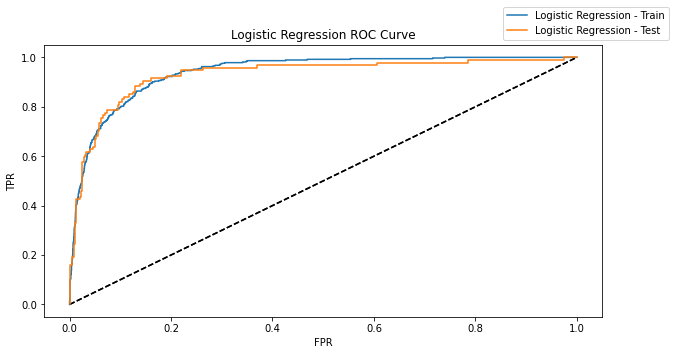

In [135]:
lr = LogisticRegression(class_weight='balanced')

lr.fit(x_train, y_train)

y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

print("========================== Logistic Regression - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lr.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(lr.score(x_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lr = cross_val_score(lr, x_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lr)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lr[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lr)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lr.predict_proba(x_test)[:,1]
y_train_pred_prob = lr.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Logistic Regression ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

========================== Decision Tree - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.999
Test Accuracy: 0.895
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.697
Fold - 2
CV Score = 0.714
Fold - 3
CV Score = 0.706
Fold - 4
CV Score = 0.685
Fold - 5
CV Score = 0.719
Average 5-Fold CV Score: 0.704
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[856  51]
 [ 54  40]]
Train Confusion Matrix: 
[[3626    3]
 [   0  374]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       907
           1       0.44      0.43      0.43        94

    accuracy                           0.90      1001
   macro avg       0.69      0.68      0.69      1001
weighted avg       0.89      0.90      0.89      1001

Train Classification Report: 
          

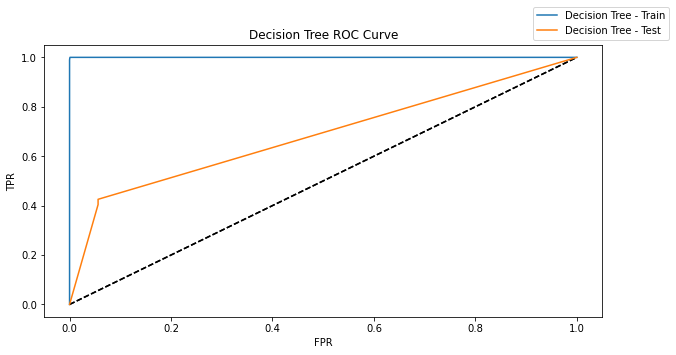

In [137]:
dt = DecisionTreeClassifier(class_weight='balanced')

dt.fit(x_train, y_train)

y_test_pred = dt.predict(x_test)
y_train_pred = dt.predict(x_train)

print("========================== Decision Tree - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(dt.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(dt.score(x_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_dt = cross_val_score(dt, x_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_dt)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_dt[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_dt)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = dt.predict_proba(x_test)[:,1]
y_train_pred_prob = dt.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Decision Tree ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Decision Tree - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

#### Bias-Variance Trade off

In [138]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2,40,2):
    vals.append(k)
    dt= DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=k)
    dt.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, dt.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])
    test_score.append(te_score)

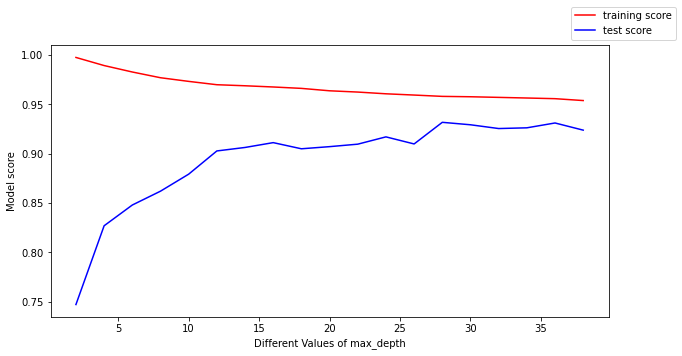

In [139]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

### Hyperparameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 38,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [142]:
params_dt = {'max_depth': [2,3,4,5,6],
             'min_samples_split':[10,20,25,30],
             'min_samples_leaf':[12,14,17,25]
              }

In [143]:
grid_dt = GridSearchCV(estimator  = dt,
                         param_grid = params_dt,
                         scoring    = 'roc_auc',
                         cv         = 5,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [144]:
grid_dt.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              min_samples_leaf=38),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [12, 14, 17, 25],
                         'min_samples_split': [10, 20, 25, 30]},
             scoring='roc_auc', verbose=True)

In [145]:
print("Best Hyperparameters: \n", grid_dt.best_params_)
print("Best AUC Score: \n", grid_dt.best_score_)

Best Hyperparameters: 
 {'max_depth': 3, 'min_samples_leaf': 12, 'min_samples_split': 10}
Best AUC Score: 
 0.9219141552609891


In [146]:
# Save the best combination of parameters as best model
best_model = grid_dt.best_estimator_

========================== Decision Tree - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.907
Test Accuracy: 0.910
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[838  69]
 [ 21  73]]
Train Confusion Matrix: 
[[3349  280]
 [  91  283]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       907
           1       0.51      0.78      0.62        94

    accuracy                           0.91      1001
   macro avg       0.74      0.85      0.78      1001
weighted avg       0.93      0.91      0.92      1001

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      3629
           1       0.50      0.76      0.60       374

    accuracy                           0.91      4003
   macro avg       0.74    

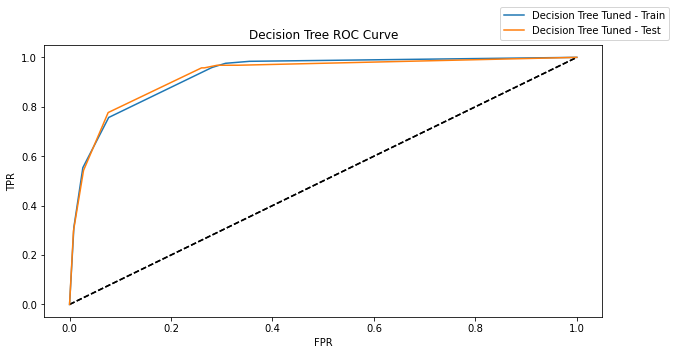

In [147]:
y_test_pred = best_model.predict(x_test)
y_train_pred = best_model.predict(x_train)


print("========================== Decision Tree - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model.score(x_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model.predict_proba(x_test)[:,1]
y_train_pred_prob = best_model.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Decision Tree ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Decision Tree Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.999
Test Accuracy: 0.929
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.933
Fold - 2
CV Score = 0.905
Fold - 3
CV Score = 0.949
Fold - 4
CV Score = 0.908
Fold - 5
CV Score = 0.913
Average 5-Fold CV Score: 0.922
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[888  19]
 [ 52  42]]
Train Confusion Matrix: 
[[3626    3]
 [   0  374]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       907
           1       0.69      0.45      0.54        94

    accuracy                           0.93      1001
   macro avg       0.82      0.71      0.75      1001
weighted avg       0.92      0.93      0.92      1001

Train Classification Report: 
          

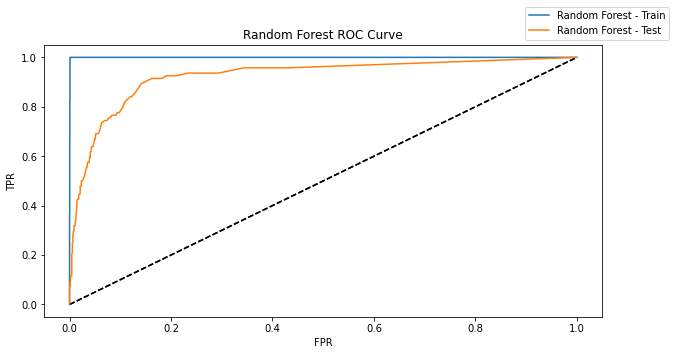

In [149]:
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(rf.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(rf.score(x_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_rf)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_rf[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_rf)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = rf.predict_proba(x_test)[:,1]
y_train_pred_prob = rf.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

#### Bias_variance tradeoff

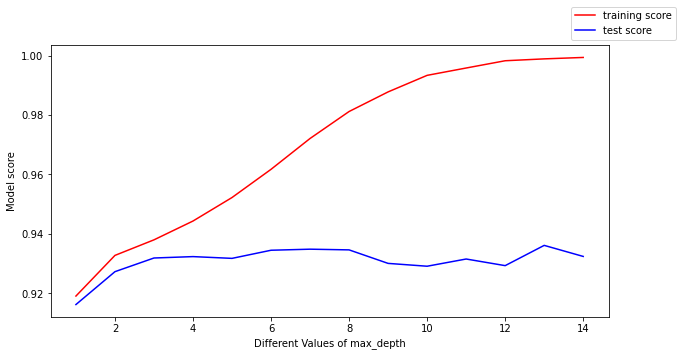

In [199]:
train_score = []
test_score = []
vals = []

for k in np.arange(1,15,1):
    vals.append(k)
    rf= RandomForestClassifier(class_weight='balanced',max_depth=k)
    rf.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

The graph above shows model score against the parameter max_depth varying from 1 to 15.
This graph shows after value 3 the train AUC increases but test AUC decreases. So during hyperparameter tuning we varied max_depth from 2 to 5.

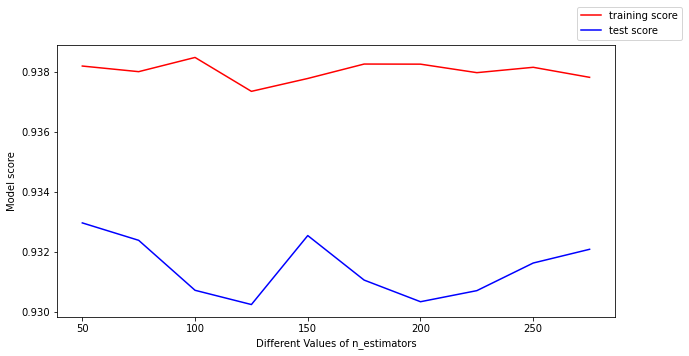

In [200]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(50,300,25):
    vals.append(k)
    rf= RandomForestClassifier(class_weight='balanced',n_estimators=k,max_depth=3)
    rf.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n_estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

The above graph shows model score against the parameter n_estimators varying from 50 to 300.
This graph shows where train AUC increases but test AUC decreases. So during hyperparameter tuning we varied max_depth from 50 to 225.

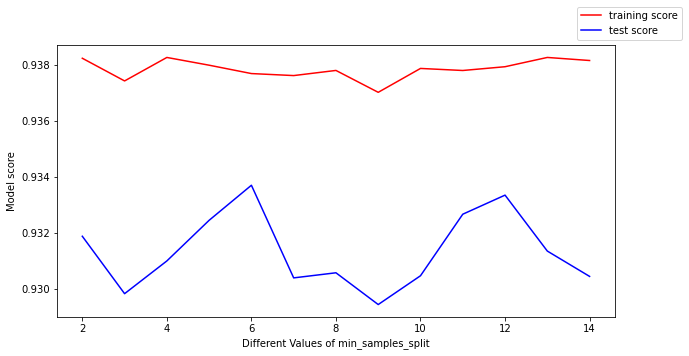

In [202]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2,15,1):
    vals.append(k)
    rf= RandomForestClassifier(class_weight='balanced',min_samples_split=k,max_depth=3)
    rf.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_samples_split')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

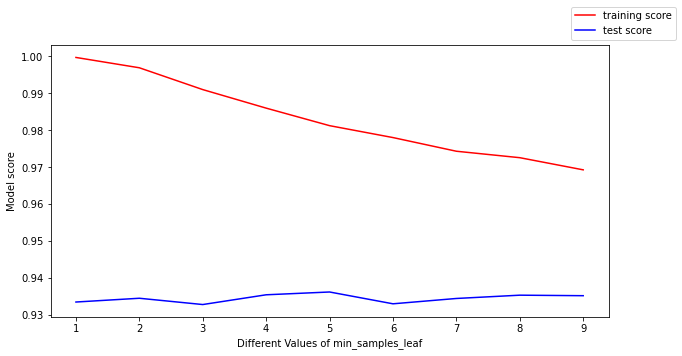

In [203]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1,10,1):
    vals.append(k)
    rf= RandomForestClassifier(class_weight='balanced',min_samples_leaf=k)
    rf.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_samples_leaf')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1,10,1):
    vals.append(k)
    rf= RandomForestClassifier(class_weight='balanced',min_samples_leaf=k)
    rf.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_samples_leaf')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

### Hyperparameter Tuning

In [152]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 275,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [204]:
params_rf = {'max_depth': [2,3,4,5,6],
               'min_samples_split':[2,3,4,6],
               'min_samples_leaf':[1,2,3],
               'n_estimators':[50,75,100,130,225],
              }

In [205]:
grid_rf = GridSearchCV(estimator  = rf,
                         param_grid = params_rf,
                         scoring    = 'roc_auc',
                         cv         = 5,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [206]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              min_samples_leaf=9),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 6],
                         'n_estimators': [50, 75, 100, 130, 225]},
             scoring='roc_auc', verbose=True)

In [207]:
print("Best Hyperparameters: \n", grid_rf.best_params_)
print("Best AUC Score: \n", grid_rf.best_score_)

Best Hyperparameters: 
 {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best AUC Score: 
 0.9339498056049781


In [208]:
# Save the best combination of parameters as best model
best_model_rf = grid_rf.best_estimator_

========================== Random Forest Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.816
Test Accuracy: 0.823
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[736 171]
 [  6  88]]
Train Confusion Matrix: 
[[2927  702]
 [  33  341]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       907
           1       0.34      0.94      0.50        94

    accuracy                           0.82      1001
   macro avg       0.67      0.87      0.70      1001
weighted avg       0.93      0.82      0.86      1001

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      3629
           1       0.33      0.91      0.48       374

    accuracy                           0.82      4003
   macro avg       0.

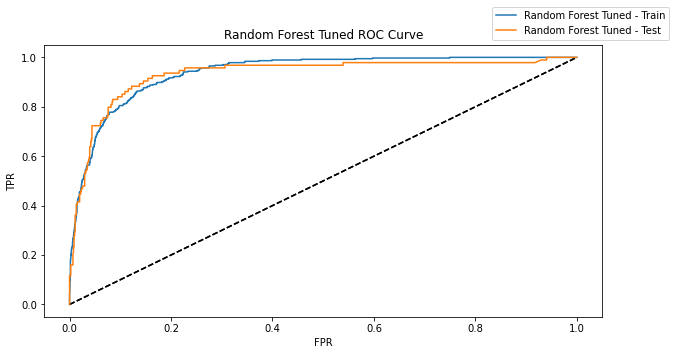

In [209]:
y_test_pred = best_model_rf.predict(x_test)
y_train_pred = best_model_rf.predict(x_train)


print("========================== Random Forest Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_rf.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_rf.score(x_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_rf.predict_proba(x_test)[:,1]
y_train_pred_prob = best_model_rf.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

###  setting the max depth =3

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.809
Test Accuracy: 0.820
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.938
Fold - 2
CV Score = 0.930
Fold - 3
CV Score = 0.948
Fold - 4
CV Score = 0.929
Fold - 5
CV Score = 0.923
Average 5-Fold CV Score: 0.934
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[733 174]
 [  6  88]]
Train Confusion Matrix: 
[[2898  731]
 [  33  341]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       907
           1       0.34      0.94      0.49        94

    accuracy                           0.82      1001
   macro avg       0.66      0.87      0.69      1001
weighted avg       0.93      0.82      0.85      1001

Train Classification Report: 
          

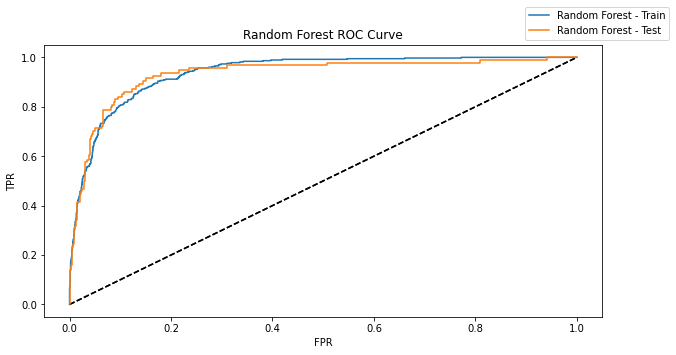

In [159]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=3)

rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(rf.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(rf.score(x_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_rf)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_rf[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_rf)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = rf.predict_proba(x_test)[:,1]
y_train_pred_prob = rf.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# Light GBM

In [160]:
from lightgbm import LGBMClassifier

========================== Light GBM - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.973
Test Accuracy: 0.910
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.928
Fold - 2
CV Score = 0.905
Fold - 3
CV Score = 0.943
Fold - 4
CV Score = 0.913
Fold - 5
CV Score = 0.909
Average 5-Fold CV Score: 0.919
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[845  62]
 [ 28  66]]
Train Confusion Matrix: 
[[3521  108]
 [   0  374]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       907
           1       0.52      0.70      0.59        94

    accuracy                           0.91      1001
   macro avg       0.74      0.82      0.77      1001
weighted avg       0.93      0.91      0.92      1001

Train Classification Report: 
              

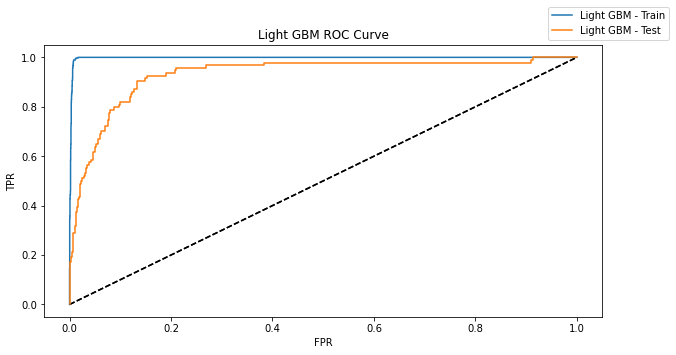

In [161]:
lgbm = LGBMClassifier(class_weight='balanced')

lgbm.fit(x_train, y_train)

y_test_pred = lgbm.predict(x_test)
y_train_pred = lgbm.predict(x_train)

print("========================== Light GBM - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lgbm.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(lgbm.score(x_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lgbm = cross_val_score(lgbm, x_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lgbm)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lgbm[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lgbm)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lgbm.predict_proba(x_test)[:,1]
y_train_pred_prob = lgbm.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

### Bias-Variance trade-off

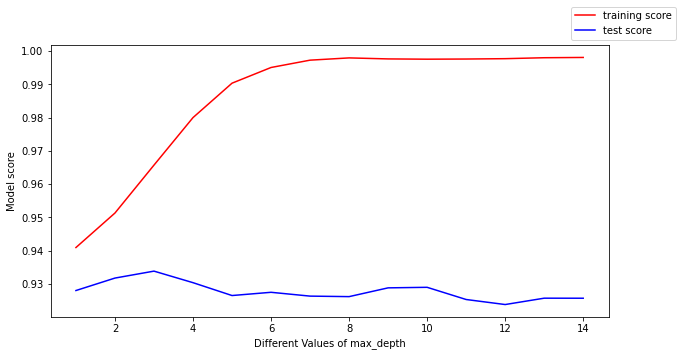

In [192]:
# varying max_depth
train_score = []
test_score = []
vals = []


for k in np.arange(1,15,1):
    vals.append(k)
    lgbm= LGBMClassifier(class_weight='balanced',max_depth =k)
    lgbm.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

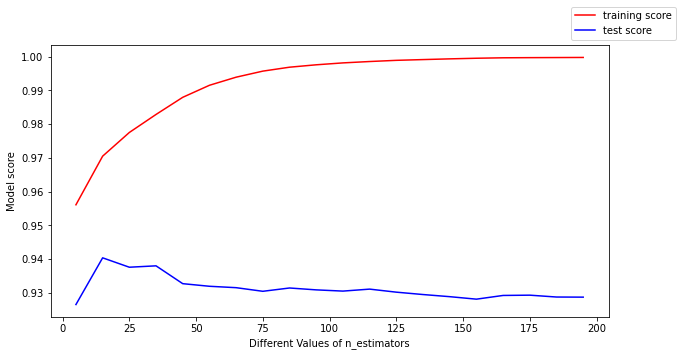

In [193]:
# varying n_estimators
train_score = []
test_score = []
vals = []


for k in np.arange(5,200,10):
    vals.append(k)
    lgbm= LGBMClassifier(class_weight='balanced',n_estimators =k)
    lgbm.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n_estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

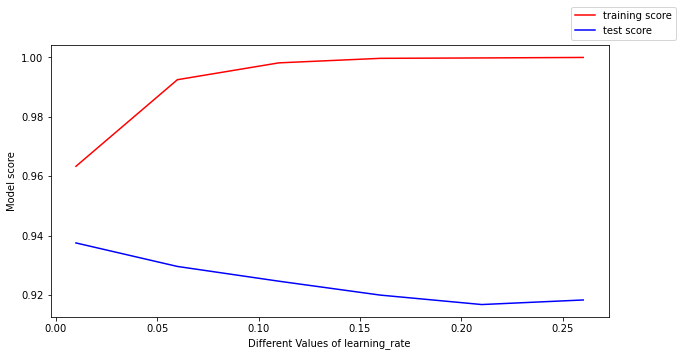

In [197]:
# varying learning_rate
train_score = []
test_score = []
vals = []


for k in np.arange(0.01,0.3,0.05):
    vals.append(k)
    lgbm= LGBMClassifier(class_weight='balanced',learning_rate =k)
    lgbm.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of learning_rate')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

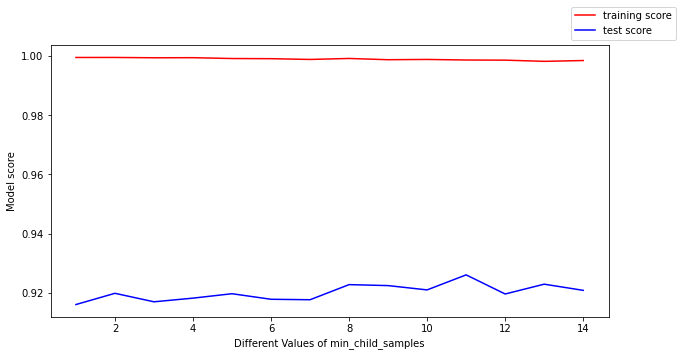

In [198]:
# varying min_child_samples
train_score = []
test_score = []
vals = []


for k in np.arange(1,15,1):
    vals.append(k)
    lgbm= LGBMClassifier(class_weight='balanced',min_child_samples =k)
    lgbm.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_child_samples')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [162]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(5,200,15):
    vals.append(k)
    lgbm= LGBMClassifier(class_weight='balanced', n_estimators = k,min_child_samples=5,max_depth=2)
    lgbm.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, lgbm.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lgbm.predict_proba(x_test)[:,1])
    test_score.append(te_score)

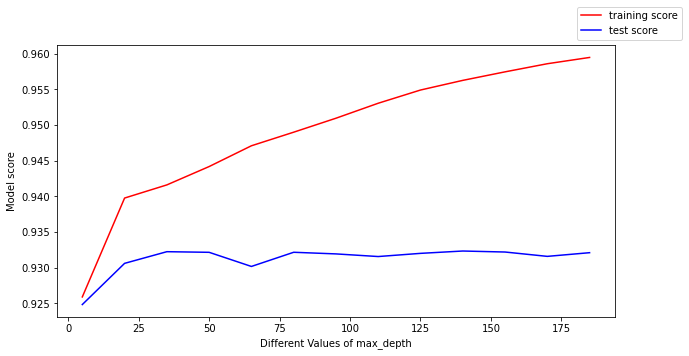

In [163]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

### hyperparameter tuning

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_samples': 5,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 185,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [166]:
params_lgbm = {'max_depth': [1,2,3,4,5],
               'learning_rate':[0.05,0.2,0.5,0.7],
               'min_child_samples':[5,15,30, 40,50],
               'n_estimators':[20,30,40,50],
              }

In [167]:
grid_lgbm = GridSearchCV(estimator  = lgbm,
                         param_grid = params_lgbm,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [168]:
grid_lgbm.fit(x_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', max_depth=2,
                                      min_child_samples=5, n_estimators=185),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.2, 0.5, 0.7],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_samples': [5, 15, 30, 40, 50],
                         'n_estimators': [20, 30, 40, 50]},
             scoring='roc_auc', verbose=True)

In [169]:
print("Best Hyperparameters: \n", grid_lgbm.best_params_)
print("Best AUC Score: \n", grid_lgbm.best_score_)

Best Hyperparameters: 
 {'learning_rate': 0.05, 'max_depth': 2, 'min_child_samples': 50, 'n_estimators': 50}
Best AUC Score: 
 0.9324409718661918


In [170]:
# Save the best combination of parameters as best model
best_model_lgbm = grid_lgbm.best_estimator_

========================== Light GBM Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.822
Test Accuracy: 0.832
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[747 160]
 [  8  86]]
Train Confusion Matrix: 
[[2953  676]
 [  35  339]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       907
           1       0.35      0.91      0.51        94

    accuracy                           0.83      1001
   macro avg       0.67      0.87      0.70      1001
weighted avg       0.93      0.83      0.86      1001

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      3629
           1       0.33      0.91      0.49       374

    accuracy                           0.82      4003
   macro avg       0.66  

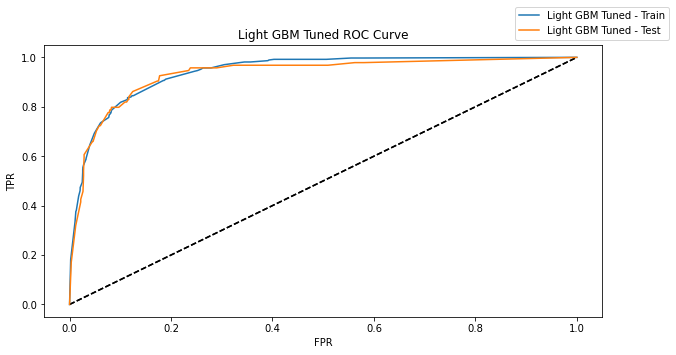

In [171]:
y_test_pred = best_model_lgbm.predict(x_test)
y_train_pred = best_model_lgbm.predict(x_train)


print("========================== Light GBM Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_lgbm.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_lgbm.score(x_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_lgbm.predict_proba(x_test)[:,1]
y_train_pred_prob = best_model_lgbm.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# XGBoost

In [172]:
from xgboost import XGBClassifier

========================== XG Boost - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.998
Test Accuracy: 0.927
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.920
Fold - 2
CV Score = 0.904
Fold - 3
CV Score = 0.944
Fold - 4
CV Score = 0.902
Fold - 5
CV Score = 0.903
Average 5-Fold CV Score: 0.915
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[879  28]
 [ 45  49]]
Train Confusion Matrix: 
[[3627    2]
 [   7  367]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       907
           1       0.64      0.52      0.57        94

    accuracy                           0.93      1001
   macro avg       0.79      0.75      0.77      1001
weighted avg       0.92      0.93      0.92      1001

Train Classification Report: 
              p

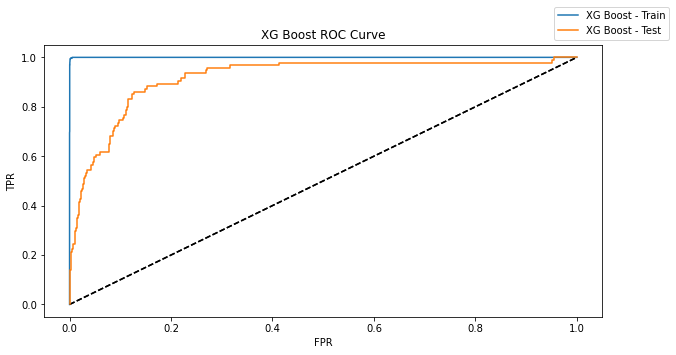

In [173]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

y_test_pred = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

print("========================== XG Boost - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(xgb.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(xgb.score(x_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_xgb = cross_val_score(xgb, x_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_xgb)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_xgb[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_xgb)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = xgb.predict_proba(x_test)[:,1]
y_train_pred_prob = xgb.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XG Boost ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XG Boost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XG Boost - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

This model is overfitted so we have to go for hyperparameter tuning. Before that we need to check bias variance tradeoff

### bias variance trade off

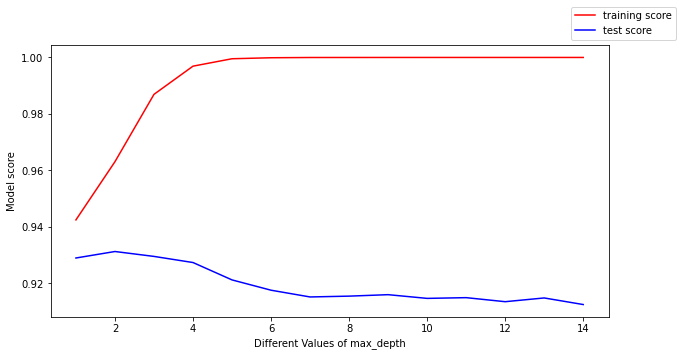

In [187]:
# varying max_depth
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1,15,1):
    vals.append(k)
    xgb= XGBClassifier(max_depth =k)
    xgb.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, xgb.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

The above graph tells us that after 4 train_AUC increases but test_AUC decreases. So we must check max_depth from 2 to 4 where the model performs best

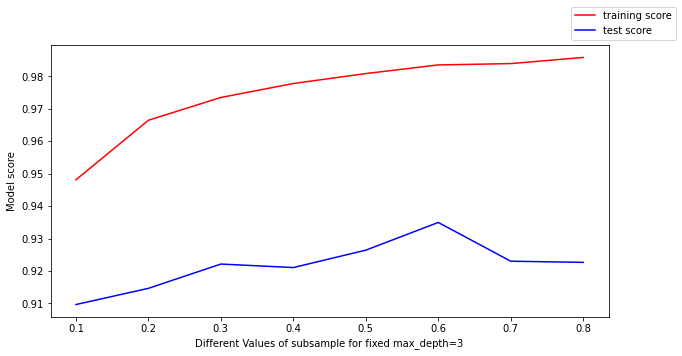

In [188]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.1,0.9,0.1):
    vals.append(k)
    xgb= XGBClassifier(subsample=k,max_depth = 3)
    xgb.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, xgb.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of subsample for fixed max_depth=3')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

At subsample=0.6 both AUC values are high so we need check in neighbourhood region

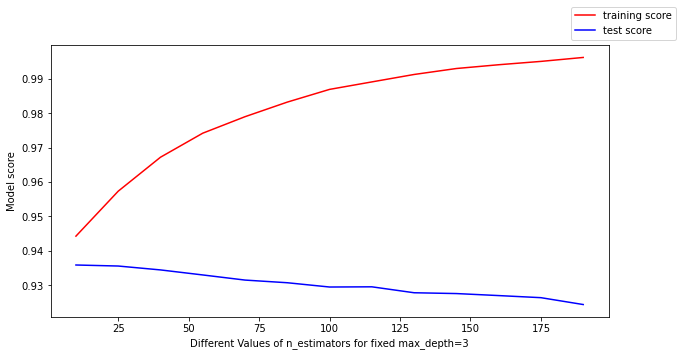

In [189]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(10,200,15):
    vals.append(k)
    xgb= XGBClassifier(n_estimators=k,max_depth = 3)
    xgb.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, xgb.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n_estimators for fixed max_depth=3')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

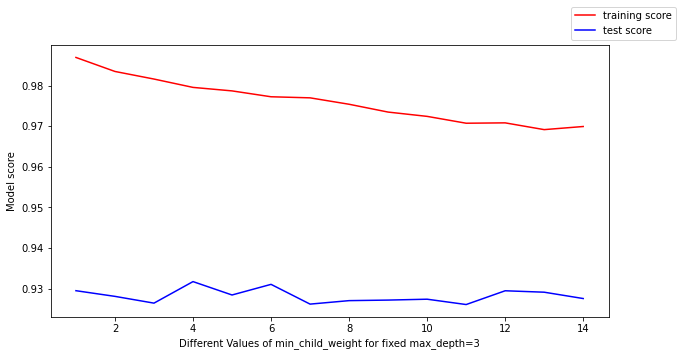

In [191]:
train_score = []
test_score = []
vals = []


for k in np.arange(1,15,1):
    vals.append(k)
    xgb= XGBClassifier(min_child_weight=k,max_depth = 3, n_estimators=100)
    xgb.fit(x_train, y_train)
    
    tr_score = roc_auc_score(y_train, xgb.predict_proba(x_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])
    test_score.append(te_score)
    
    
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_child_weight for fixed max_depth=3')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

**From the other parameters we got some feasible range of values for hyperparameters. Now we are to perform grid search to find the best possible combination of hyperparameters.**

### Hyper parameter Tuning

In [176]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [177]:
params_xgb = {'max_depth': [1,3,4,5],
               'learning_rate':[0.025,0.03,0.05,0.055],
               'min_child_weight':[2,3,4],
               'n_estimators':[10,20,50,100],
               'subsample':[0.1,0.2,0.4,0.6]
              }

In [178]:
grid_xgb = GridSearchCV(estimator  = xgb,
                         param_grid = params_xgb,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [179]:
grid_xgb.fit(x_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_ca...
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parall

In [180]:
print("Best Hyperparameters: \n", grid_xgb.best_params_)
print("Best AUC Score: \n", grid_xgb.best_score_)

Best Hyperparameters: 
 {'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.4}
Best AUC Score: 
 0.9364010980547638


In [181]:
# Save the best combination of parameters as best model
best_model_xgb = grid_xgb.best_estimator_

========================== XG Boost Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.939
Test Accuracy: 0.934
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[886  21]
 [ 45  49]]
Train Confusion Matrix: 
[[3558   71]
 [ 172  202]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       907
           1       0.70      0.52      0.60        94

    accuracy                           0.93      1001
   macro avg       0.83      0.75      0.78      1001
weighted avg       0.93      0.93      0.93      1001

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3629
           1       0.74      0.54      0.62       374

    accuracy                           0.94      4003
   macro avg       0.85   

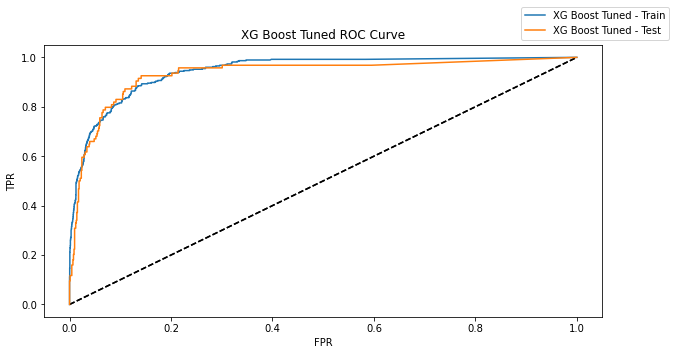

In [182]:
y_test_pred = best_model_xgb.predict(x_test)
y_train_pred = best_model_xgb.predict(x_train)


print("========================== XG Boost Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_xgb.score(x_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_xgb.score(x_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_xgb.predict_proba(x_test)[:,1]
y_train_pred_prob = best_model_xgb.predict_proba(x_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XG Boost Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XG Boost Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XG Boost Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [183]:
# A new experiment

In [186]:
with open('xgb_pkl_2', 'wb') as files:
    pickle.dump(best_model_xgb, files)

In [185]:
import pickle

### Saving the best model as pickle model

In [155]:
import pickle

In [156]:
# xgboost and random forest

In [157]:
with open('lgbm_pkl_1', 'wb') as files:
    pickle.dump(best_model_lgbm, files)

In [158]:
# load saved model
with open('lgbm_pkl_1' , 'rb') as f:
    lgbm = pickle.load(f)

In [159]:
with open('rf_pkl_1', 'wb') as files:
    pickle.dump(best_model_rf, files)

In [160]:
# load saved model
with open('rf_pkl_1' , 'rb') as f:
    rf = pickle.load(f)

In [235]:
with open('xgb_pkl_1', 'wb') as files:
    pickle.dump(best_model_xgb, files)

In [236]:
# load saved model
with open('xgb_pkl_1' , 'rb') as f:
    xgb = pickle.load(f)

# Step 5: Model Scoring & Business KPIs
### We will score the model with Validation Data

- Perform all the pre-processing steps like imputation, scaling etc using numbers from development sample
- Score the model and report the Performance KPIs

In [166]:
val=health_validation

In [163]:
raw_features=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\RAW_Features.csv")

In [164]:
raw_feat=list(raw_features['Raw Features'])
raw_feat

['Provider',
 'InscClaimAmtReimbursed_merged_sum',
 'ClmDiagnosisCode_8_in_count',
 'InscClaimAmtReimbursed_in_sum',
 'Race_3_merged_sum',
 'InscClaimAmtReimbursed_out_std',
 'Race_2_merged_sum',
 'InscClaimAmtReimbursed_merged_max',
 'OtherPhysician_out_nunique',
 'ChronicCond_Cancer_merged_sum',
 'Race_5_merged_sum',
 'ClmDiagnosisCode_7_in_nunique',
 'InscClaimAmtReimbursed_in_min',
 'ChronicCond_stroke_merged_sum',
 'InscClaimAmtReimbursed_in_max',
 'Age_merged_max',
 'AttendingPhysician_out_nunique',
 'ClmDiagnosisCode_5_in_count',
 'Age_merged_min',
 'Claim_duration_merged_mean',
 'InscClaimAmtReimbursed_out_mean',
 'ChronicCond_rheumatoidarthritis_merged_sum',
 'OperatingPhysician_out_nunique',
 'InscClaimAmtReimbursed_merged_std',
 'OtherPhysician_in_nunique',
 'ChronicCond_KidneyDisease_merged_sum',
 'InscClaimAmtReimbursed_out_max',
 'Age_merged_mean',
 'ClmDiagnosisCode_6_out_count',
 'ClmDiagnosisCode_9_out_count',
 'ClmDiagnosisCode_7_out_nunique',
 'ChronicCond_ObstrPulmo

In [167]:
# Keeping only raw features
val_score = val[raw_feat]

In [168]:
val_score.head(5)

,Provider,InscClaimAmtReimbursed_merged_sum,ClmDiagnosisCode_8_in_count,InscClaimAmtReimbursed_in_sum,Race_3_merged_sum,InscClaimAmtReimbursed_out_std,Race_2_merged_sum,InscClaimAmtReimbursed_merged_max,OtherPhysician_out_nunique,ChronicCond_Cancer_merged_sum,Race_5_merged_sum,ClmDiagnosisCode_7_in_nunique,InscClaimAmtReimbursed_in_min,ChronicCond_stroke_merged_sum,InscClaimAmtReimbursed_in_max,Age_merged_max,AttendingPhysician_out_nunique,ClmDiagnosisCode_5_in_count,Age_merged_min,Claim_duration_merged_mean,InscClaimAmtReimbursed_out_mean,ChronicCond_rheumatoidarthritis_merged_sum,OperatingPhysician_out_nunique,InscClaimAmtReimbursed_merged_std,OtherPhysician_in_nunique,ChronicCond_KidneyDisease_merged_sum,InscClaimAmtReimbursed_out_max,Age_merged_mean,ClmDiagnosisCode_6_out_count,ClmDiagnosisCode_9_out_count,ClmDiagnosisCode_7_out_nunique,ChronicCond_ObstrPulmonary_merged_sum,ClmDiagnosisCode_9_in_count,ClmDiagnosisCode_9_in_nunique,OperatingPhysician_in_nunique,ChronicCond_Alzheimer_merged_sum,PotentialFraud
0,PRV51041,7410,0.0,0.0,0.0,562.423217,8.0,3200,5.0,10,0.0,0.0,0.0,2,0.0,91.0,9.0,0.0,38.0,3.352941,217.941176,9,4.0,562.423217,0.0,7,3200.0,70.823529,4.0,0.0,2.0,10,0.0,0.0,0.0,16,0
1,PRV51042,48050,0.0,0.0,0.0,625.791569,6.0,3300,27.0,20,1.0,0.0,0.0,13,0.0,100.0,52.0,0.0,27.0,2.232394,338.380282,38,27.0,625.791569,0.0,58,3300.0,73.147887,9.0,3.0,7.0,41,0.0,0.0,0.0,50,0
2,PRV51064,360320,26.0,280000.0,0.0,539.722216,65.0,37000,61.0,39,1.0,28.0,0.0,41,37000.0,100.0,97.0,33.0,29.0,2.950495,300.823970,92,32.0,3480.867524,6.0,139,3300.0,73.415842,34.0,8.0,22.0,107,21.0,21.0,17.0,110,1
3,PRV51098,300,0.0,0.0,0.0,85.049005,0.0,200,2.0,1,0.0,0.0,0.0,1,0.0,90.0,2.0,0.0,69.0,1.000000,75.000000,3,0.0,85.049005,0.0,2,200.0,82.500000,1.0,0.0,1.0,2,0.0,0.0,0.0,0,0
4,PRV51139,52580,6.0,41300.0,3.0,611.391855,4.0,14000,10.0,7,1.0,7.0,3000.0,3,14000.0,96.0,28.0,7.0,35.0,3.465116,313.333333,8,7.0,2617.764700,1.0,16,2600.0,74.767442,2.0,2.0,2.0,12,5.0,5.0,1.0,15,0


In [169]:
val_score['derived_ClmDiagnosisCode_9_flag'] = np.where(val_score['ClmDiagnosisCode_9_in_count']>val_score['ClmDiagnosisCode_9_in_nunique'], 1, 0)
val_score['derived_Race_3_flag'] = np.where(val_score['Race_3_merged_sum']>=30, 1, 0)

In [194]:
raw_to_woe_feat=list(set(raw_feat)-set(['ClmDiagnosisCode_9_in_count'])-set(['ClmDiagnosisCode_9_in_nunique'])-set(['Provider'])-set(['PotentialFraud']))
raw_to_woe_feat

['InscClaimAmtReimbursed_out_max',
 'ClmDiagnosisCode_5_in_count',
 'ClmDiagnosisCode_8_in_count',
 'ChronicCond_rheumatoidarthritis_merged_sum',
 'InscClaimAmtReimbursed_in_sum',
 'ClmDiagnosisCode_9_out_count',
 'ChronicCond_stroke_merged_sum',
 'Race_5_merged_sum',
 'ClmDiagnosisCode_6_out_count',
 'Age_merged_max',
 'Claim_duration_merged_mean',
 'AttendingPhysician_out_nunique',
 'ClmDiagnosisCode_7_in_nunique',
 'OtherPhysician_in_nunique',
 'ChronicCond_Cancer_merged_sum',
 'ChronicCond_Alzheimer_merged_sum',
 'OperatingPhysician_out_nunique',
 'Age_merged_mean',
 'Race_2_merged_sum',
 'InscClaimAmtReimbursed_out_std',
 'OtherPhysician_out_nunique',
 'InscClaimAmtReimbursed_out_mean',
 'ChronicCond_KidneyDisease_merged_sum',
 'InscClaimAmtReimbursed_merged_std',
 'InscClaimAmtReimbursed_merged_sum',
 'ChronicCond_ObstrPulmonary_merged_sum',
 'InscClaimAmtReimbursed_merged_max',
 'OperatingPhysician_in_nunique',
 'ClmDiagnosisCode_7_out_nunique',
 'Age_merged_min',
 'InscClaimAmt

In [195]:
dev_woe.head()

,Provider,PotentialFraud,AttendingPhysician_in_nunique_woe,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_2_in_count_woe,ClmDiagnosisCode_9_in_nunique_woe,ClmDiagnosisCode_4_in_count_woe,Claim_duration_merged_mean_woe,InscClaimAmtReimbursed_out_sum_woe,OtherPhysician_in_nunique_woe,ClmDiagnosisCode_1_in_nunique_woe,ClmDiagnosisCode_5_out_nunique_woe,ChronicCond_Cancer_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,InscClaimAmtReimbursed_out_mean_woe,ClaimID_count_woe,ClmDiagnosisCode_7_in_count_woe,ClmDiagnosisCode_3_in_nunique_woe,ClmDiagnosisCode_4_out_count_woe,Race_3_merged_sum_woe,InscClaimAmtReimbursed_merged_min_woe,Flag_suspicious_merged_sum_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,ClmDiagnosisCode_1_out_count_woe,ClmDiagnosisCode_9_out_count_woe,ClmDiagnosisCode_1_out_nunique_woe,Race_5_merged_sum_woe,Gender_1_merged_sum_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_4_out_nunique_woe,ChronicCond_Alzheimer_merged_sum_woe,ClmDiagnosisCode_3_out_nunique_woe,ClmDiagnosisCode_7_out_count_woe,ClmDiagnosisCode_5_out_count_woe,ClmDiagnosisCode_9_in_count_woe,Gender_2_merged_sum_woe,InscClaimAmtReimbursed_merged_sum_woe,ClmDiagnosisCode_3_out_count_woe,InscClaimAmtReimbursed_merged_max_woe,ChronicCond_Diabetes_merged_sum_woe,InscClaimAmtReimbursed_out_min_woe,Age_merged_min_woe,InscClaimAmtReimbursed_in_max_woe,ClmDiagnosisCode_9_out_nunique_woe,InscClaimAmtReimbursed_in_min_woe,BeneID_nunique_woe,BeneID_count_woe,ChronicCond_Heartfailure_merged_sum_woe,ClmDiagnosisCode_8_out_nunique_woe,ClmDiagnosisCode_6_out_count_woe,ClmDiagnosisCode_6_in_nunique_woe,ClmDiagnosisCode_8_out_count_woe,InscClaimAmtReimbursed_out_std_woe,ClmDiagnosisCode_2_out_count_woe,ChronicCond_IschemicHeart_merged_sum_woe,ChronicCond_KidneyDisease_merged_sum_woe,ClmDiagnosisCode_5_in_nunique_woe,OperatingPhysician_in_nunique_woe,ClmDiagnosisCode_3_in_count_woe,ClmDiagnosisCode_7_out_nunique_woe,ChronicCond_Osteoporasis_merged_sum_woe,ClmDiagnosisCode_6_in_count_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_1_in_count_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_2_in_nunique_woe,ChronicCond_stroke_merged_sum_woe,ClmDiagnosisCode_2_out_nunique_woe,ClmDiagnosisCode_4_in_nunique_woe,Age_merged_max_woe,Race_1_merged_sum_woe,ClmDiagnosisCode_7_in_nunique_woe,ClmDiagnosisCode_6_out_nunique_woe,ClmDiagnosisCode_8_in_nunique_woe,InscClaimAmtReimbursed_in_std_woe,Race_2_merged_sum_woe,OtherPhysician_out_nunique_woe,InscClaimAmtReimbursed_merged_std_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_mean_woe,InscClaimAmtReimbursed_in_mean_woe,ClaimID_nunique_woe,ChronicCond_Depression_merged_sum_woe
0,PRV51001,0,0.710235,-0.680597,-0.326052,-1.056398,-0.415992,-0.085252,-0.788538,0.787152,-0.360042,-0.680048,-0.261810,-0.382496,-0.690498,-0.270062,-0.391461,-0.616900,-0.451985,-0.514616,-0.985193,-1.273347,-0.451857,-1.630640,-0.704597,-0.547580,-0.682954,-0.713800,-0.654107,-0.779034,0.304530,-0.487425,-0.846731,-0.702003,-0.598459,-0.612388,-1.111927,-0.556903,0.490155,-0.872820,1.494571,-0.679975,-0.647339,-0.931113,1.057651,-0.682954,0.474033,-0.952812,-0.391461,-1.027394,-0.649602,-0.387143,0.563343,-0.646625,0.164371,-0.753959,-0.894418,-0.616432,-0.563662,0.706212,-0.418606,-0.601604,-0.663491,0.487697,-0.362610,-0.315357,0.265013,-0.370273,-0.369243,-0.451424,-0.314615,0.246057,-0.614784,-0.589810,-0.638351,-0.850482,1.594890,-0.263246,-0.116136,1.671379,-0.798056,1.133735,1.251756,-0.391461,-0.936819
1,PRV51003,1,0.710235,0.360248,2.577777,2.502515,2.596463,0.831951,0.407252,-0.627943,2.644259,0.238411,-0.261810,0.436531,0.362694,-0.270062,0.601531,2.537353,2.657228,0.024364,-0.985193,0.386290,0.613775,2.684431,0.145465,0.189022,-0.294800,0.122419,0.119946,0.383506,1.301469,0.069247,0.380582,0.105646,-0.598459,0.050986,2.468501,0.857129,3.036800,0.050761,2.560691,0.489425,0.302124,0.143511,2.560691,-0.206794,-0.206406,0.734336,0.601531,0.

In [196]:
# now to apply woebins on validation sample
#val_score_woe = sc.woebin_ply(val_score_dropped_provider, dev_woe)

In [197]:
dev_woe_validation=pd.DataFrame()
for i in raw_to_woe_feat:
    dev_woe_validation=dev_woe_validation.append(bins[i])

In [198]:
dev_woe_validation

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,InscClaimAmtReimbursed_out_max,"[-inf,2200.0)",2397,0.479017,2278,119,0.049645,-0.680597,0.168741,0.444820,2200.0,False
1,InscClaimAmtReimbursed_out_max,"[2200.0,3200.0)",768,0.153477,712,56,0.072917,-0.271394,0.010125,0.444820,3200.0,False
2,InscClaimAmtReimbursed_out_max,"[3200.0,3800.0)",1490,0.297762,1298,192,0.128859,0.360248,0.044707,0.444820,3800.0,False
3,InscClaimAmtReimbursed_out_max,"[3800.0,inf)",349,0.069744,248,101,0.289398,1.373024,0.221247,0.444820,inf,False
0,ClmDiagnosisCode_5_in_count,"[-inf,3.0)",3450,0.689448,3385,65,0.018841,-1.681389,1.021214,2.461491,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Race_3_merged_sum,"[8.0,inf)",504,0.100719,332,172,0.341270,1.613692,0.474957,0.867086,inf,False
0,InscClaimAmtReimbursed_in_min,"[-inf,200.0)",3616,0.722622,3336,280,0.077434,-0.206406,0.028310,0.194483,200.0,False
1,InscClaimAmtReimbursed_in_min,"[200.0,2200.0)",374,0.074740,287,87,0.232620,1.077758,0.132161,0.194483,2200.0,False
2,InscClaimAmtReimbursed_in_min,"[2200.0,3200.0)",422,0.084333,362,60,0.142180,0.474033,0.022943,0.194483,3200.0,False


In [204]:
dev_woe_validation.to_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\dev_woe_validation.csv",index=False)

In [205]:
dev_woe_validation=pd.read_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\dev_woe_validation.csv")

In [176]:
df=pd.DataFrame()
test_df=pd.DataFrame(val_score[['Provider','ClmDiagnosisCode_7_out_nunique']])

test_woe_bin=bins['ClmDiagnosisCode_7_out_nunique']
test_df_woe=sc.woebin_ply(test_df,test_woe_bin)
test_df_woe.to_csv("C:\\Users\\Sahil\\Desktop\\Summer\\Project\\ClmDiagnosisCode_7_out_nunique_woe.csv",index=False)

[INFO] converting into woe values ...


In [177]:
test_df.head()

,Provider,ClmDiagnosisCode_7_out_nunique
0,PRV51041,2.0
1,PRV51042,7.0
2,PRV51064,22.0
3,PRV51098,1.0
4,PRV51139,2.0


In [178]:
test_woe_bin.head()

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ClmDiagnosisCode_7_out_nunique,"[-inf,4.0)",3364,0.672262,3184,180,0.053508,-0.601604,0.190904,0.666286,4.0,False
1,ClmDiagnosisCode_7_out_nunique,"[4.0,6.0)",506,0.101119,461,45,0.088933,-0.055403,0.000303,0.666286,6.0,False
2,ClmDiagnosisCode_7_out_nunique,"[6.0,16.0)",716,0.143086,625,91,0.127095,0.344440,0.019515,0.666286,16.0,False
3,ClmDiagnosisCode_7_out_nunique,"[16.0,inf)",418,0.083533,266,152,0.363636,1.711717,0.455564,0.666286,inf,False


In [179]:
val_score.ClmDiagnosisCode_7_out_nunique.shape

(406,)

In [180]:
test_df_woe.head()

,Provider,ClmDiagnosisCode_7_out_nunique_woe
0,PRV51041,-0.601604
1,PRV51042,0.344440
2,PRV51064,1.711717
3,PRV51098,-0.601604
4,PRV51139,-0.601604


In [181]:
val_score[raw_to_woe_feat].head()

,InscClaimAmtReimbursed_out_max,ClmDiagnosisCode_5_in_count,ClmDiagnosisCode_8_in_count,ChronicCond_rheumatoidarthritis_merged_sum,InscClaimAmtReimbursed_in_sum,ClmDiagnosisCode_9_out_count,ChronicCond_stroke_merged_sum,Race_5_merged_sum,ClmDiagnosisCode_6_out_count,Age_merged_max,Claim_duration_merged_mean,AttendingPhysician_out_nunique,ClmDiagnosisCode_7_in_nunique,OtherPhysician_in_nunique,ChronicCond_Cancer_merged_sum,ChronicCond_Alzheimer_merged_sum,OperatingPhysician_out_nunique,Age_merged_mean,Race_2_merged_sum,InscClaimAmtReimbursed_out_std,OtherPhysician_out_nunique,InscClaimAmtReimbursed_out_mean,ChronicCond_KidneyDisease_merged_sum,InscClaimAmtReimbursed_merged_std,InscClaimAmtReimbursed_merged_sum,ChronicCond_ObstrPulmonary_merged_sum,InscClaimAmtReimbursed_merged_max,OperatingPhysician_in_nunique,ClmDiagnosisCode_7_out_nunique,Age_merged_min,InscClaimAmtReimbursed_in_max,Race_3_merged_sum,InscClaimAmtReimbursed_in_min
0,3200.0,0.0,0.0,9,0.0,0.0,2,0.0,4.0,91.0,3.352941,9.0,0.0,0.0,10,16,4.0,70.823529,8.0,562.423217,5.0,217.941176,7,562.423217,7410,10,3200,0.0,2.0,38.0,0.0,0.0,0.0
1,3300.0,0.0,0.0,38,0.0,3.0,13,1.0,9.0,100.0,2.232394,52.0,0.0,0.0,20,50,27.0,73.147887,6.0,625.791569,27.0,338.380282,58,625.791569,48050,41,3300,0.0,7.0,27.0,0.0,0.0,0.0
2,3300.0,33.0,26.0,92,280000.0,8.0,41,1.0,34.0,100.0,2.950495,97.0,28.0,6.0,39,110,32.0,73.415842,65.0,539.722216,61.0,300.823970,139,3480.867524,360320,107,37000,17.0,22.0,29.0,37000.0,0.0,0.0
3,200.0,0.0,0.0,3,0.0,0.0,1,0.0,1.0,90.0,1.000000,2.0,0.0,0.0,1,0,0.0,82.500000,0.0,85.049005,2.0,75.000000,2,85.049005,300,2,200,0.0,1.0,69.0,0.0,0.0,0.0
4,2600.0,7.0,6.0,8,41300.0,2.0,3,1.0,2.0,96.0,3.465116,28.0,7.0,1.0,7,15,7.0,74.767442,4.0,611.391855,10.0,313.333333,16,2617.764700,52580,12,14000,1.0,2.0,35.0,14000.0,3.0,3000.0


In [199]:
raw_to_woe_feat

['InscClaimAmtReimbursed_out_max',
 'ClmDiagnosisCode_5_in_count',
 'ClmDiagnosisCode_8_in_count',
 'ChronicCond_rheumatoidarthritis_merged_sum',
 'InscClaimAmtReimbursed_in_sum',
 'ClmDiagnosisCode_9_out_count',
 'ChronicCond_stroke_merged_sum',
 'Race_5_merged_sum',
 'ClmDiagnosisCode_6_out_count',
 'Age_merged_max',
 'Claim_duration_merged_mean',
 'AttendingPhysician_out_nunique',
 'ClmDiagnosisCode_7_in_nunique',
 'OtherPhysician_in_nunique',
 'ChronicCond_Cancer_merged_sum',
 'ChronicCond_Alzheimer_merged_sum',
 'OperatingPhysician_out_nunique',
 'Age_merged_mean',
 'Race_2_merged_sum',
 'InscClaimAmtReimbursed_out_std',
 'OtherPhysician_out_nunique',
 'InscClaimAmtReimbursed_out_mean',
 'ChronicCond_KidneyDisease_merged_sum',
 'InscClaimAmtReimbursed_merged_std',
 'InscClaimAmtReimbursed_merged_sum',
 'ChronicCond_ObstrPulmonary_merged_sum',
 'InscClaimAmtReimbursed_merged_max',
 'OperatingPhysician_in_nunique',
 'ClmDiagnosisCode_7_out_nunique',
 'Age_merged_min',
 'InscClaimAmt

In [200]:
# now to apply woebins on validation sample
val_score_woe = sc.woebin_ply(val_score[['Provider','Race_2_merged_sum',
 'ClmDiagnosisCode_9_out_count',
 'AttendingPhysician_out_nunique',
 'OperatingPhysician_out_nunique',
 'ChronicCond_KidneyDisease_merged_sum',
 'ClmDiagnosisCode_5_in_count','InscClaimAmtReimbursed_out_mean',
 'ClmDiagnosisCode_6_out_count',
 'ClmDiagnosisCode_7_in_nunique',
 'OtherPhysician_in_nunique',
 'Claim_duration_merged_mean',
 'Race_5_merged_sum',
 'InscClaimAmtReimbursed_in_sum','InscClaimAmtReimbursed_merged_sum','Age_merged_mean',
 'ChronicCond_Alzheimer_merged_sum',
 'InscClaimAmtReimbursed_merged_std',
 'ChronicCond_Cancer_merged_sum',
 'Race_3_merged_sum',
 'ClmDiagnosisCode_8_in_count',
 'Age_merged_min',
 'Age_merged_max',
 'OtherPhysician_out_nunique',
 'InscClaimAmtReimbursed_in_min',
 'InscClaimAmtReimbursed_out_max','InscClaimAmtReimbursed_in_max',
 'InscClaimAmtReimbursed_merged_max',
 'ChronicCond_ObstrPulmonary_merged_sum','InscClaimAmtReimbursed_out_std',
 'OperatingPhysician_in_nunique',
 'ChronicCond_rheumatoidarthritis_merged_sum','ChronicCond_stroke_merged_sum','PotentialFraud'
 ]], dev_woe_validation)

[INFO] converting into woe values ...


In [185]:
#val_score_woe['ClmDiagnosisCode_7_out_nunique_woe']=test_df_woe

In [201]:
val_score_woe.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_9_out_count_woe,ChronicCond_stroke_merged_sum_woe,Race_5_merged_sum_woe,ClmDiagnosisCode_6_out_count_woe,Age_merged_max_woe,Claim_duration_merged_mean_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_7_in_nunique_woe,OtherPhysician_in_nunique_woe,ChronicCond_Cancer_merged_sum_woe,ChronicCond_Alzheimer_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,Race_2_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,OtherPhysician_out_nunique_woe,InscClaimAmtReimbursed_out_mean_woe,ChronicCond_KidneyDisease_merged_sum_woe,InscClaimAmtReimbursed_merged_std_woe,InscClaimAmtReimbursed_merged_sum_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_max_woe,OperatingPhysician_in_nunique_woe,Age_merged_min_woe,InscClaimAmtReimbursed_in_max_woe,Race_3_merged_sum_woe,InscClaimAmtReimbursed_in_min_woe
0,PRV51041,0,0.360248,-1.681389,-1.630640,-0.704597,-1.678762,-0.682954,-1.037195,-0.654107,-0.387143,-0.649957,0.406422,0.304530,-1.692548,-0.627943,-0.261810,-0.846731,-0.382496,0.362694,0.304822,0.563833,-0.116136,-0.309632,-1.634001,-1.055606,-3.665324,-0.798056,-1.471500,-1.682472,0.143511,-1.663163,-0.985193,-0.206406
1,PRV51042,0,0.360248,-1.681389,-1.630640,0.145465,-1.678762,0.066408,0.506889,0.119946,0.225207,0.246057,-0.085252,1.301469,-1.692548,-0.627943,0.629105,0.380582,1.316732,0.362694,0.304822,0.563833,1.429440,0.514969,0.608696,-1.055606,-2.013239,0.418948,-1.471500,-1.682472,1.024200,-1.663163,-0.985193,-0.206406
2,PRV51064,1,0.360248,2.636906,2.684431,1.871733,2.220651,1.416544,1.911093,0.119946,1.593642,0.246057,-0.085252,1.301469,2.621535,1.823080,1.851632,1.816995,1.316732,0.362694,1.554152,0.164371,1.429440,0.514969,1.999133,0.043085,3.036800,1.744260,1.494571,1.514409,1.024200,1.057651,-0.985193,-0.206406
3,PRV51098,0,-0.680597,-1.681389,-1.630640,-1.971326,-1.678762,-0.682954,-1.872349,-0.654107,-0.705217,-0.649957,-2.396451,-1.323694,-1.692548,-0.627943,-1.913259,-3.517097,-0.885071,-1.806205,-1.422265,-0.662909,-1.395688,-1.823012,-1.634001,-3.266789,-3.665324,-1.933360,-3.487569,-1.682472,-1.841361,-1.663163,-0.985193,-0.206406
4,PRV51139,0,-0.271394,0.667036,0.616512,-0.704597,-0.218325,0.066408,-1.037195,0.119946,-0.387143,-0.649957,0.406422,0.304530,0.597900,0.787152,-0.261810,-0.846731,0.436531,0.362694,-0.263246,0.563833,-0.116136,0.514969,-0.616432,0.043085,0.490155,-0.798056,0.117609,0.706212,0.143511,-0.196332,0.491191,0.474033


In [202]:
val_score_woe = sc.woebin_ply(val_score[raw_to_woe_feat],dev_woe_validation)

[INFO] converting into woe values ...


In [191]:
val_score_woe.head()

,InscClaimAmtReimbursed_out_max_woe,ClmDiagnosisCode_5_in_count_woe,ClmDiagnosisCode_8_in_count_woe,ChronicCond_rheumatoidarthritis_merged_sum_woe,InscClaimAmtReimbursed_in_sum_woe,ClmDiagnosisCode_9_out_count_woe,ChronicCond_stroke_merged_sum_woe,ClmDiagnosisCode_6_out_count_woe,Race_5_merged_sum_woe,Age_merged_max_woe,Claim_duration_merged_mean_woe,AttendingPhysician_out_nunique_woe,ClmDiagnosisCode_7_in_nunique_woe,OtherPhysician_in_nunique_woe,ChronicCond_Cancer_merged_sum_woe,ChronicCond_Alzheimer_merged_sum_woe,OperatingPhysician_out_nunique_woe,Age_merged_mean_woe,Race_2_merged_sum_woe,InscClaimAmtReimbursed_out_std_woe,OtherPhysician_out_nunique_woe,InscClaimAmtReimbursed_out_mean_woe,ChronicCond_KidneyDisease_merged_sum_woe,InscClaimAmtReimbursed_merged_std_woe,InscClaimAmtReimbursed_merged_sum_woe,ChronicCond_ObstrPulmonary_merged_sum_woe,InscClaimAmtReimbursed_merged_max_woe,OperatingPhysician_in_nunique_woe,ClmDiagnosisCode_7_out_nunique_woe,Age_merged_min_woe,InscClaimAmtReimbursed_in_max_woe,Race_3_merged_sum_woe,InscClaimAmtReimbursed_in_min_woe
0,0.360248,-1.681389,-1.630640,-0.704597,-1.678762,-0.682954,-1.037195,-0.387143,-0.654107,-0.649957,0.406422,0.304530,-1.692548,-0.627943,-0.261810,-0.846731,-0.382496,0.362694,0.304822,0.563833,-0.116136,-0.309632,-1.634001,-1.055606,-3.665324,-0.798056,-1.471500,-1.682472,-0.601604,0.143511,-1.663163,-0.985193,-0.206406
1,0.360248,-1.681389,-1.630640,0.145465,-1.678762,0.066408,0.506889,0.225207,0.119946,0.246057,-0.085252,1.301469,-1.692548,-0.627943,0.629105,0.380582,1.316732,0.362694,0.304822,0.563833,1.429440,0.514969,0.608696,-1.055606,-2.013239,0.418948,-1.471500,-1.682472,0.344440,1.024200,-1.663163,-0.985193,-0.206406
2,0.360248,2.636906,2.684431,1.871733,2.220651,1.416544,1.911093,1.593642,0.119946,0.246057,-0.085252,1.301469,2.621535,1.823080,1.851632,1.816995,1.316732,0.362694,1.554152,0.164371,1.429440,0.514969,1.999133,0.043085,3.036800,1.744260,1.494571,1.514409,1.711717,1.024200,1.057651,-0.985193,-0.206406
3,-0.680597,-1.681389,-1.630640,-1.971326,-1.678762,-0.682954,-1.872349,-0.705217,-0.654107,-0.649957,-2.396451,-1.323694,-1.692548,-0.627943,-1.913259,-3.517097,-0.885071,-1.806205,-1.422265,-0.662909,-1.395688,-1.823012,-1.634001,-3.266789,-3.665324,-1.933360,-3.487569,-1.682472,-0.601604,-1.841361,-1.663163,-0.985193,-0.206406
4,-0.271394,0.667036,0.616512,-0.704597,-0.218325,0.066408,-1.037195,-0.387143,0.119946,-0.649957,0.406422,0.304530,0.597900,0.787152,-0.261810,-0.846731,0.436531,0.362694,-0.263246,0.563833,-0.116136,0.514969,-0.616432,0.043085,0.490155,-0.798056,0.117609,0.706212,-0.601604,0.143511,-0.196332,0.491191,0.474033
